# 1. Packages import

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None

# 2. Dataset import

In [3]:
heart_disease_dataset = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
heart_disease_dataset

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# 3. EDA

In [4]:
heart_disease_dataset.shape

(253680, 22)

In [5]:
heart_disease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

The dataset has already been cleaned of null values 

In [6]:
#Verifying that we only have 0 and 1 in our dependant variable "HeartDiseaseorAttack"
heart_disease_dataset["HeartDiseaseorAttack"].unique()


array([0., 1.])

People who have been reported as having a Heart Disease or Attack (HDA) have the value "1" in the related column

## 3.1 Looking at primary correlation between the variables

In [7]:
heart_disease_dataset.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


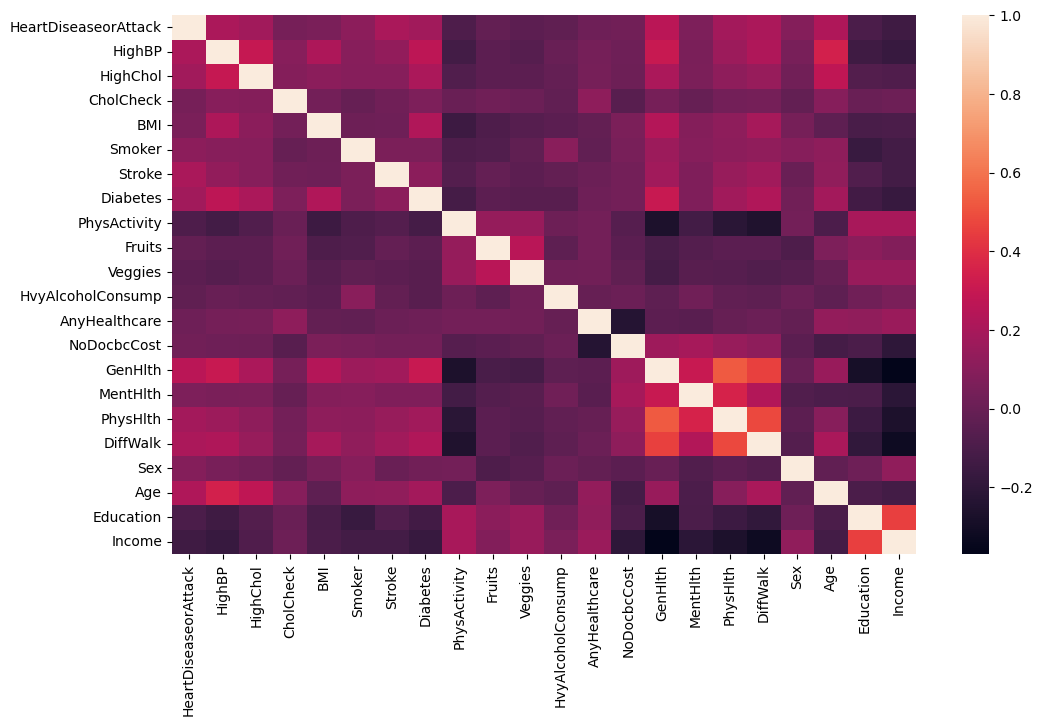

In [8]:
#Looking at possible correlation between variables
heart_disease_corr = heart_disease_dataset.corr()
plt.figure(figsize=(12,7))
sns.heatmap(data = heart_disease_corr)
heart_disease_corr.style.background_gradient(cmap='coolwarm')

At first glance, there doesn't seem to be any particular correlation between our values, the highest correlations being between general health and physical health, which does not come as a surprise.
The correlation between physical health and difficulty walking is one of the highest here but is objectively not that high. 
There also seem to be a correlation between education and income (which is not that high either here).

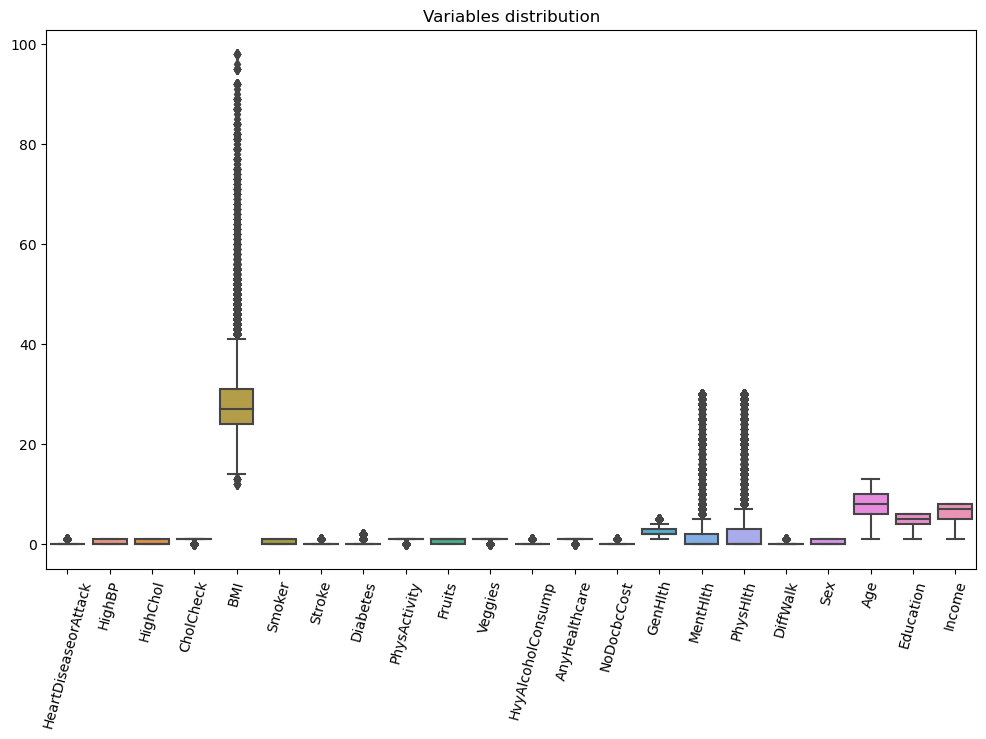

In [9]:
#Data distribution
plt.figure(figsize=(12,7))
sns.boxplot(data = heart_disease_dataset).set(title = "Variables distribution")
plt.xticks(rotation = 75)
plt.show()

As seen when describing the data, BMI, mental health and physical health have the highest standard deviation, and therefore a lot of outliers

## 3.2 Blood Pressure

In the original dataset, there were no "real" value given to define high BP, the respondents simply had to report whether their doctor had told them they had "high BP".

In [10]:
#Isolating BP and plotting
# 1 = High BP, 0 = low BP
BP_check = heart_disease_dataset[["HeartDiseaseorAttack","HighBP"]]
BP_check = pd.DataFrame(BP_check.value_counts())
BP_check.reset_index(inplace = True)
BP_check.rename(columns = {0 : "Number_of_people"}, inplace = True)


''' Sorting by BP to make sure that when I use another df (latest information) with the same info, 
the totals will be added correctly.(In the same order than here : low BP first, high BP later). See total calculation 
and addition below
'''
BP_check.sort_values(by = "HighBP", inplace = True)
BP_check

,HeartDiseaseorAttack,HighBP,Number_of_people
0,0.0,0.0,138886
3,1.0,0.0,5965
1,0.0,1.0,90901
2,1.0,1.0,17928


In [11]:
#Transforming values into string to improve graph reading
BP_check["HighBP"] = BP_check["HighBP"].astype(str)
BP_check["HighBP"] = BP_check["HighBP"].replace("0.0", "Low BP").replace("1.0","High BP")
BP_check

,HeartDiseaseorAttack,HighBP,Number_of_people
0,0.0,Low BP,138886
3,1.0,Low BP,5965
1,0.0,High BP,90901
2,1.0,High BP,17928


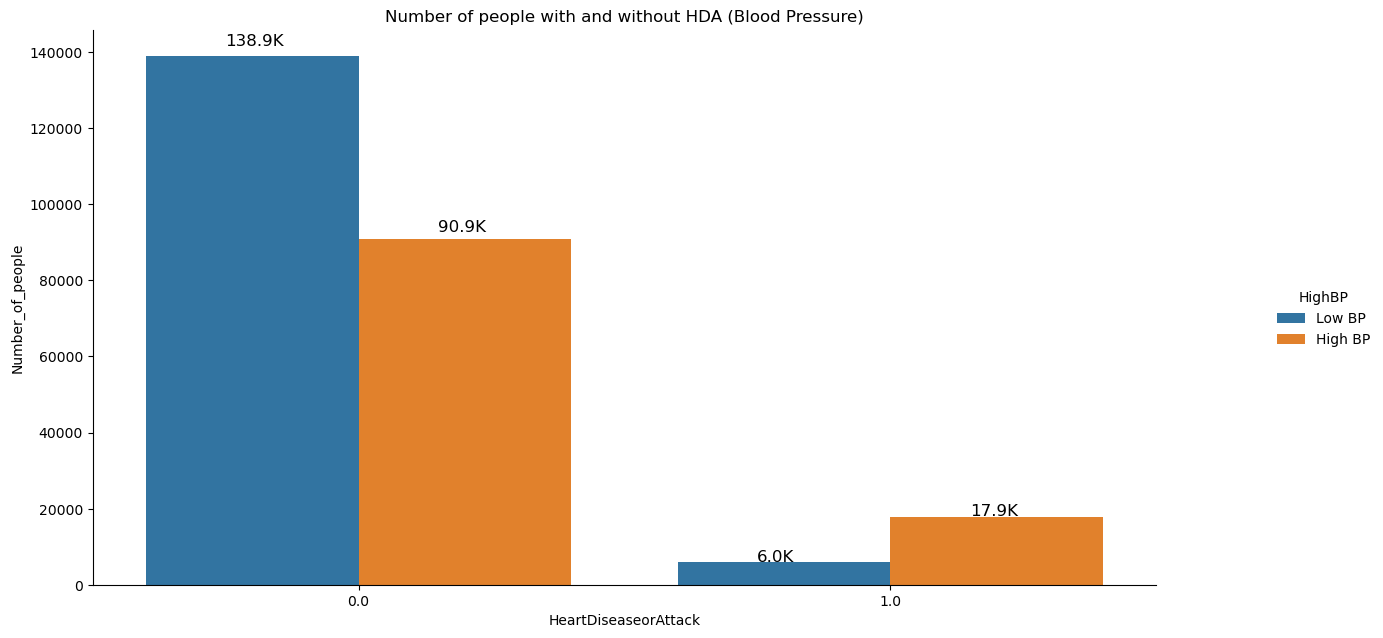

In [12]:
g = sns.catplot(kind = "bar",data = BP_check, x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "HighBP").set(title = "Number of people with and without HDA (Blood Pressure)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

Although there are less people with high BP in the dataset, the number of high BP people with an HDA is higher than the number of non-high BP people, this indicates that BP plays an important role in developping an HDA or not.

To make a good comparison, I will see the percentage of people developping an HDA in each category.

In [13]:
#Total calculations 

#Finding how many people had high BP
BP_count_1 = pd.DataFrame(heart_disease_dataset["HighBP"])
BP_is_1 = BP_count_1[BP_count_1["HighBP"] == 1]
BP_is_1 = len(BP_is_1)
BP_is_1

#Finding how many people had low BP
BP_count_0 = pd.DataFrame(heart_disease_dataset["HighBP"])
BP_is_0 = BP_count_0[BP_count_0["HighBP"] == 0]
BP_is_0 = len(BP_is_0)
BP_is_0

print(f"{BP_is_0} people reported having low BP.")
print(f"{BP_is_1} people reported having high BP.")
print(f"Total number of people : {BP_is_1 + BP_is_0 }")

144851 people reported having low BP.
108829 people reported having high BP.
Total number of people : 253680


In [14]:
''' Adding totals to the df, since its is sorted the Low BP are always the first two, 
the high BP are third and fourth position. The same method will be done in the whole notebook '''

#Adding totals to the table  and calculating percentages
total_BP = [BP_is_0,BP_is_0,BP_is_1,BP_is_1]
BP_check["total_in_each_BP_category"] = total_BP
BP_check["Percentage"] = round(BP_check["Number_of_people"] / BP_check["total_in_each_BP_category"] *100,2)
BP_check

,HeartDiseaseorAttack,HighBP,Number_of_people,total_in_each_BP_category,Percentage
0,0.0,Low BP,138886,144851,95.88
3,1.0,Low BP,5965,144851,4.12
1,0.0,High BP,90901,108829,83.53
2,1.0,High BP,17928,108829,16.47


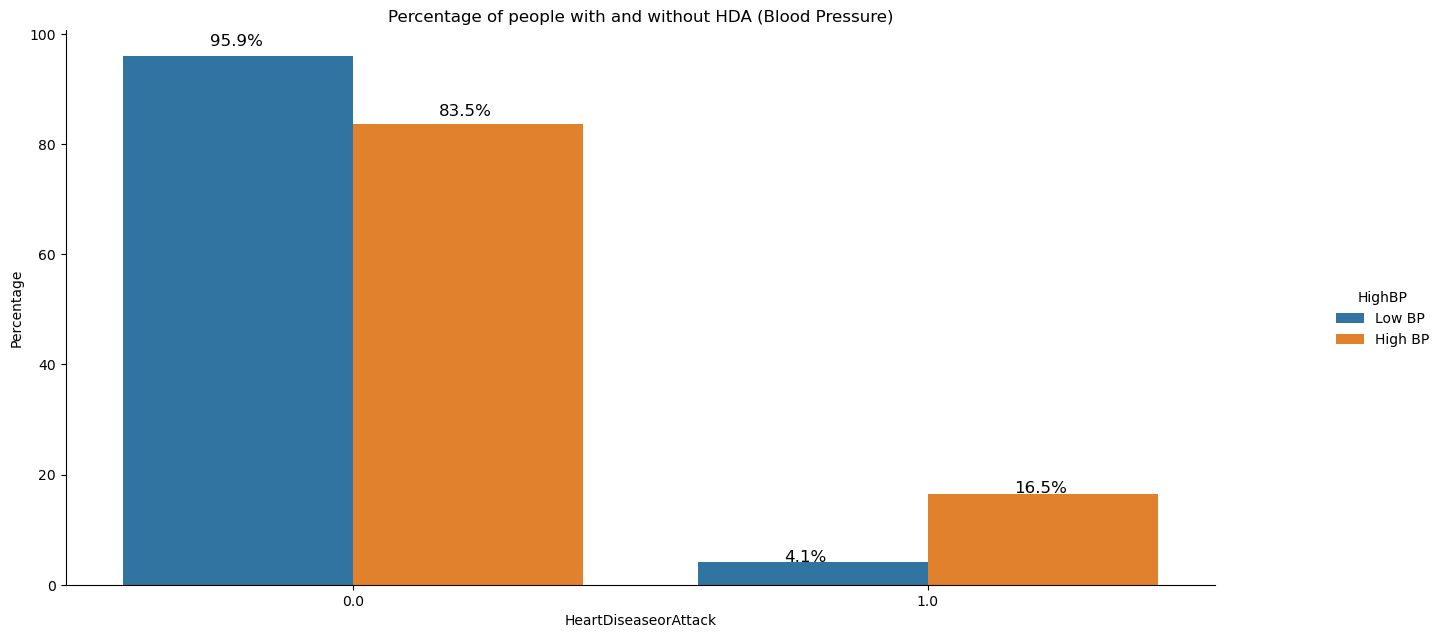

In [15]:
g = sns.catplot(kind="bar", data = BP_check, x = "HeartDiseaseorAttack", y = "Percentage", hue = "HighBP").set(title = "Percentage of people with and without HDA (Blood Pressure)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

Amoung people with high BP, 16.47% reported having an HDA.

Amoung people with low BP, only 4.12% reported having an HDA.

## 3.3 Cholesterol

In the original dataset, there were no "real" value given to define high cholesterol, the respondents simply had to report whether their doctor had told them they had "high cholesterol".

In [16]:
#Isolating cholesterol and plotting
# 1 = High cholesterol, 0 = low cholesterol

chol_check = heart_disease_dataset[["HeartDiseaseorAttack","HighChol"]]
number_of_people_chol_check = pd.DataFrame(chol_check.value_counts())
number_of_people_chol_check.reset_index(inplace = True)
number_of_people_chol_check.rename(columns = {0 : "Number_of_people"}, inplace = True)

#Sorting
number_of_people_chol_check.sort_values(by = "HighChol", inplace = True)

#Transforming values into string to improve graph reading
number_of_people_chol_check["HighChol"] = number_of_people_chol_check["HighChol"].astype(str)
number_of_people_chol_check["HighChol"] = number_of_people_chol_check["HighChol"].replace("0.0", "Low Cholesterol").replace("1.0","High Cholesterol")
number_of_people_chol_check

,HeartDiseaseorAttack,HighChol,Number_of_people
0,0.0,Low Cholesterol,138949
3,1.0,Low Cholesterol,7140
1,0.0,High Cholesterol,90838
2,1.0,High Cholesterol,16753


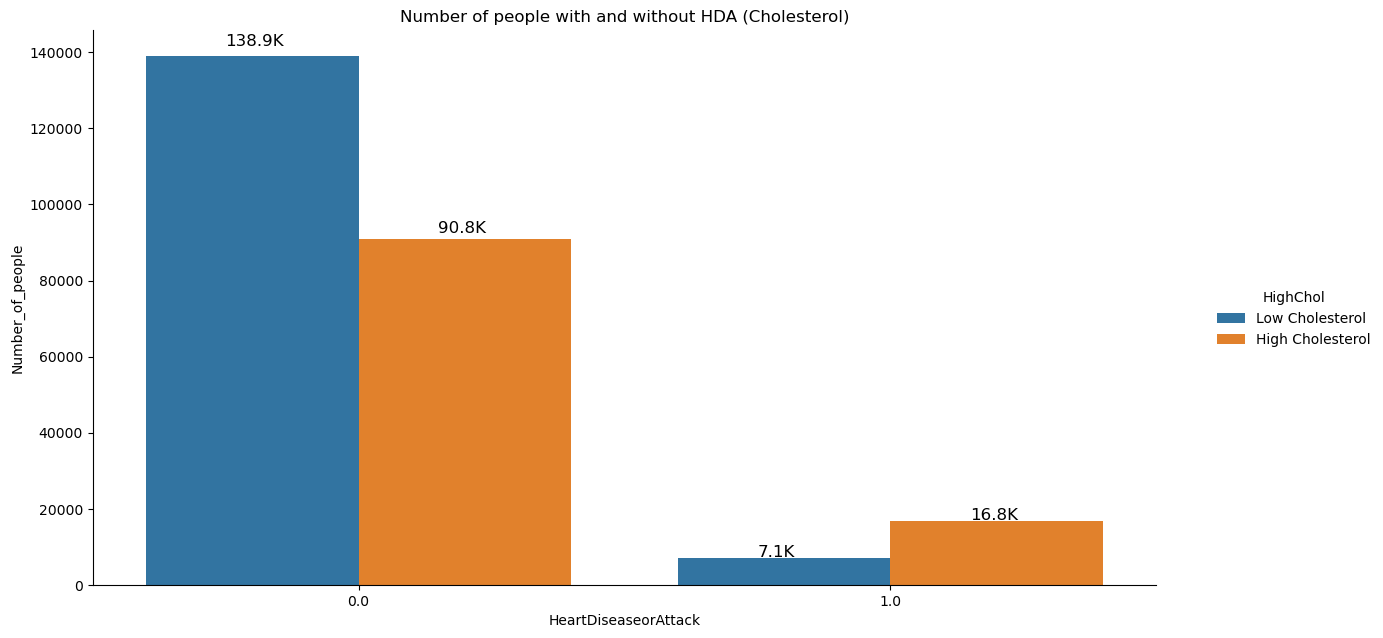

In [17]:
g = sns.catplot(kind ="bar", data = number_of_people_chol_check, x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "HighChol").set(title = "Number of people with and without HDA (Cholesterol)")
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

Although there are less people with high cholesterol in the dataset, the number of high cholesterol people with an HDA is higher than the number of non-high cholesterol people, this indicates that cholesterol plays an important role in developping an HDA or not.

To make a good comparison, I will see the percentage of people developping a HDA in each category;

In [18]:
#Total calculations 

#Finding how many people had high cholesterol
choles_count_1 = pd.DataFrame(heart_disease_dataset["HighChol"])
choles_is_1 = choles_count_1[choles_count_1["HighChol"] == 1]
choles_is_1 = len(choles_is_1)
choles_is_1

#Finding how many people had low cholesterol
choles_count_0 = pd.DataFrame(heart_disease_dataset["HighChol"])
choles_is_0 = choles_count_0[choles_count_0["HighChol"] == 0]
choles_is_0 = len(choles_is_0)
choles_is_0

print(f"{choles_is_0} people reported having a low cholesterol.")
print(f"{choles_is_1} people reported having a high cholesterol.")
print(f"Total number of people : {choles_is_1 + choles_is_0 }")

#Adding totals to the table and calculating percentages
total_chol = [choles_is_0, choles_is_0, choles_is_1, choles_is_1]
number_of_people_chol_check["total_people_in each_cholesterol_category"] = total_chol
number_of_people_chol_check["percentage_of_people"] = round(number_of_people_chol_check["Number_of_people"]/number_of_people_chol_check["total_people_in each_cholesterol_category"] * 100,2)
number_of_people_chol_check

146089 people reported having a low cholesterol.
107591 people reported having a high cholesterol.
Total number of people : 253680


,HeartDiseaseorAttack,HighChol,Number_of_people,total_people_in each_cholesterol_category,percentage_of_people
0,0.0,Low Cholesterol,138949,146089,95.11
3,1.0,Low Cholesterol,7140,146089,4.89
1,0.0,High Cholesterol,90838,107591,84.43
2,1.0,High Cholesterol,16753,107591,15.57


Amoung people with high cholesterol, 15.57% reported having an HDA.

Amoung people with low cholesterol, only 4.89% reported having an HDA.

## 3.4 BMI (Body Mass Index)

If the BMI is:

between 25.0 and 29.9, it indicates overweight;

between 30.0 and 34.9, it indicates moderate obesity;

between 35.0 and 39.9, it indicates severe obesity;

above 40 it is referred to as massive obesity.

In [19]:
#Isolationg the needed columns and sorting the values
HDA_BMI = heart_disease_dataset[["HeartDiseaseorAttack","BMI"]]
HDA_BMI.sort_values(by = "BMI", inplace = True)
HDA_BMI

#has_disease = HDA_BMI[HDA_BMI["HeartDiseaseorAttack"] == 1]
#doesnt_have_disease = HDA_BMI[HDA_BMI["HeartDiseaseorAttack"] == 0]

,HeartDiseaseorAttack,BMI
49827,0.0,12.0
239607,0.0,12.0
98002,0.0,12.0
177462,1.0,12.0
136036,0.0,12.0
...,...,...
79507,0.0,98.0
76394,1.0,98.0
76532,0.0,98.0
79478,0.0,98.0


In [20]:
#Creating BMI groups and adding a column with the group description

normal_BMI = HDA_BMI[HDA_BMI["BMI"] < 25]
normal_BMI["BMI_Group"] = "Normal_BMI"


overweight = HDA_BMI.loc[(HDA_BMI.BMI >= 25) & (HDA_BMI.BMI < 30)]
overweight["BMI_Group"] = "Overweight"

moderate_obesity = HDA_BMI.loc[(HDA_BMI.BMI >= 30) & (HDA_BMI.BMI < 35)]
moderate_obesity["BMI_Group"] = "Moderate obesity"

severe_obesity = HDA_BMI.loc[(HDA_BMI.BMI >= 35) & (HDA_BMI.BMI < 40)]
severe_obesity["BMI_Group"] = "Severe obesity"


massive_obesity = HDA_BMI.loc[(HDA_BMI.BMI >= 40)]
massive_obesity["BMI_Group"] = "Massive obesity"


#Appending the dataframes together for visualisation
all_BMI = normal_BMI.append(overweight).append(moderate_obesity).append(severe_obesity).append(massive_obesity)
all_BMI.sample(25)

,HeartDiseaseorAttack,BMI,BMI_Group
158032,0.0,23.0,Normal_BMI
20778,0.0,25.0,Overweight
158233,0.0,25.0,Overweight
188139,1.0,35.0,Severe obesity
168060,0.0,30.0,Moderate obesity
48813,0.0,23.0,Normal_BMI
116201,0.0,27.0,Overweight
172794,1.0,25.0,Overweight
36757,0.0,23.0,Normal_BMI
7310,0.0,25.0,Overweight


In [21]:
#Creating the needed dataframe to plot
nb_of_people_depending_on_BMI = all_BMI.groupby("BMI_Group").value_counts().to_frame()
nb_of_people_depending_on_BMI = pd.DataFrame(nb_of_people_depending_on_BMI)
nb_of_people_depending_on_BMI.reset_index(inplace = True)
nb_of_people_depending_on_BMI.drop(columns = ["BMI"], inplace = True)
nb_of_people_depending_on_BMI.columns = ["BMI_Group", "HeartDiseaseorAttack","Nb_of_people"]

nb_of_people_depending_on_BMI = nb_of_people_depending_on_BMI.groupby(["BMI_Group","HeartDiseaseorAttack"]).sum()
nb_of_people_depending_on_BMI.reset_index(inplace = True)
nb_of_people_depending_on_BMI
#The total number of people is 253 680, as expected

#Sorting
nb_of_people_depending_on_BMI.sort_values(by = "BMI_Group", inplace = True)
nb_of_people_depending_on_BMI

,BMI_Group,HeartDiseaseorAttack,Nb_of_people
0,Massive obesity,0.0,12053
1,Massive obesity,1.0,1684
2,Moderate obesity,0.0,47519
3,Moderate obesity,1.0,5932
4,Normal_BMI,0.0,67030
5,Normal_BMI,1.0,5050
6,Overweight,0.0,85035
7,Overweight,1.0,8714
8,Severe obesity,0.0,18150
9,Severe obesity,1.0,2513


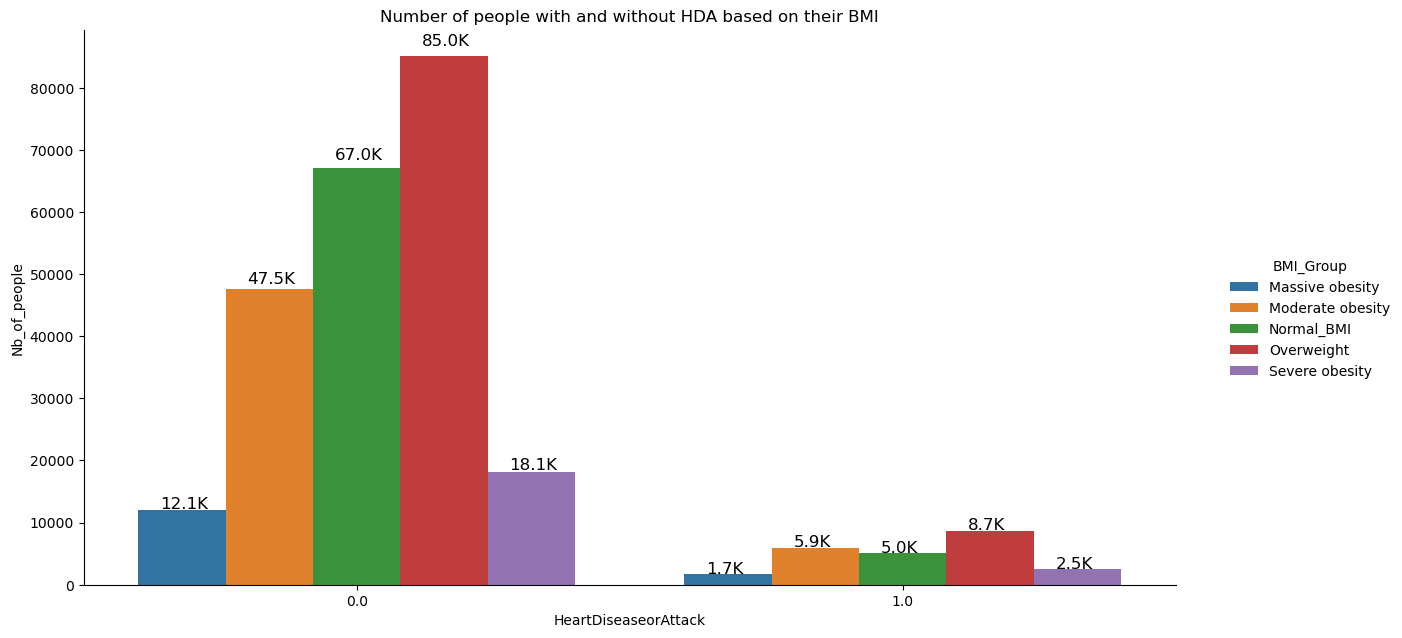

In [22]:
g = sns.catplot(kind='bar', data=nb_of_people_depending_on_BMI, x='HeartDiseaseorAttack', y='Nb_of_people', hue = 'BMI_Group').set(title = "Number of people with and without HDA based on their BMI")
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.04, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

From the graphic, there seem to be a higher number of people with heart disease issues among people with a higher BMI.
But we need to look at it while comparing with the total number of people in each category

In [23]:
#Total calculations
Normal_BMI_total = all_BMI[all_BMI["BMI_Group"] == "Normal_BMI"]
Normal_BMI_total = len(Normal_BMI_total)


Overweight_BMI_total = all_BMI[all_BMI["BMI_Group"] == "Overweight"]
Overweight_BMI_total = len(Overweight_BMI_total)
Overweight_BMI_total


Moderate_obesity_total = all_BMI[all_BMI["BMI_Group"] == "Moderate obesity"]
Moderate_obesity_total = len(Moderate_obesity_total)
Moderate_obesity_total

Massive_obesity_total = all_BMI[all_BMI["BMI_Group"] == "Massive obesity"]
Massive_obesity_total = len(Massive_obesity_total)
Massive_obesity_total

Severe_obesity_total = all_BMI[all_BMI["BMI_Group"] == "Severe obesity"]
Severe_obesity_total = len(Severe_obesity_total)
Severe_obesity_total

print(f"{Normal_BMI_total} people have a normal BMI, {Overweight_BMI_total} people are overweight")
print(f"{Moderate_obesity_total} people have a moderate obesity, {Massive_obesity_total} people have a massive obesity.")
print(f"{Severe_obesity_total} people have a severe obesity")
print(f"Total number of people : {Normal_BMI_total + Overweight_BMI_total + Moderate_obesity_total + Massive_obesity_total + Severe_obesity_total }")


'''Since the BMI column has become, BMI_Group, the df is now sorting by BMI_Group in alphabetical order 
(No longer sorted by numerical order where what is now "normal BMI" would have been first because it was number from 0 to 25)
I therefore need to add totals in the new alphabetical order to add the right values in the output'''


#Adding the totals of each category to the table
total = [Massive_obesity_total,Massive_obesity_total,Moderate_obesity_total,Moderate_obesity_total,Normal_BMI_total,Normal_BMI_total,Overweight_BMI_total,Overweight_BMI_total,Severe_obesity_total,Severe_obesity_total]
nb_of_people_depending_on_BMI["total"] = total

#Transforming the new column into the right type to calculate the percentage
nb_of_people_depending_on_BMI["total"] = nb_of_people_depending_on_BMI["total"].astype(int)
nb_of_people_depending_on_BMI["percentage_of_total"] = round(nb_of_people_depending_on_BMI["Nb_of_people"] / nb_of_people_depending_on_BMI["total"]*100,2)
nb_of_people_depending_on_BMI

72080 people have a normal BMI, 93749 people are overweight
53451 people have a moderate obesity, 13737 people have a massive obesity.
20663 people have a severe obesity
Total number of people : 253680


,BMI_Group,HeartDiseaseorAttack,Nb_of_people,total,percentage_of_total
0,Massive obesity,0.0,12053,13737,87.74
1,Massive obesity,1.0,1684,13737,12.26
2,Moderate obesity,0.0,47519,53451,88.90
3,Moderate obesity,1.0,5932,53451,11.10
4,Normal_BMI,0.0,67030,72080,92.99
5,Normal_BMI,1.0,5050,72080,7.01
6,Overweight,0.0,85035,93749,90.70
7,Overweight,1.0,8714,93749,9.30
8,Severe obesity,0.0,18150,20663,87.84
9,Severe obesity,1.0,2513,20663,12.16


In [24]:
#Only keeping people with heart disease to simplify graph reading
nb_of_people_with_disease_depending_on_BMI = nb_of_people_depending_on_BMI[nb_of_people_depending_on_BMI["HeartDiseaseorAttack"] == 1 ]
nb_of_people_with_disease_depending_on_BMI.sort_values(by = "percentage_of_total", inplace = True)
nb_of_people_with_disease_depending_on_BMI

,BMI_Group,HeartDiseaseorAttack,Nb_of_people,total,percentage_of_total
5,Normal_BMI,1.0,5050,72080,7.01
7,Overweight,1.0,8714,93749,9.30
3,Moderate obesity,1.0,5932,53451,11.10
9,Severe obesity,1.0,2513,20663,12.16
1,Massive obesity,1.0,1684,13737,12.26


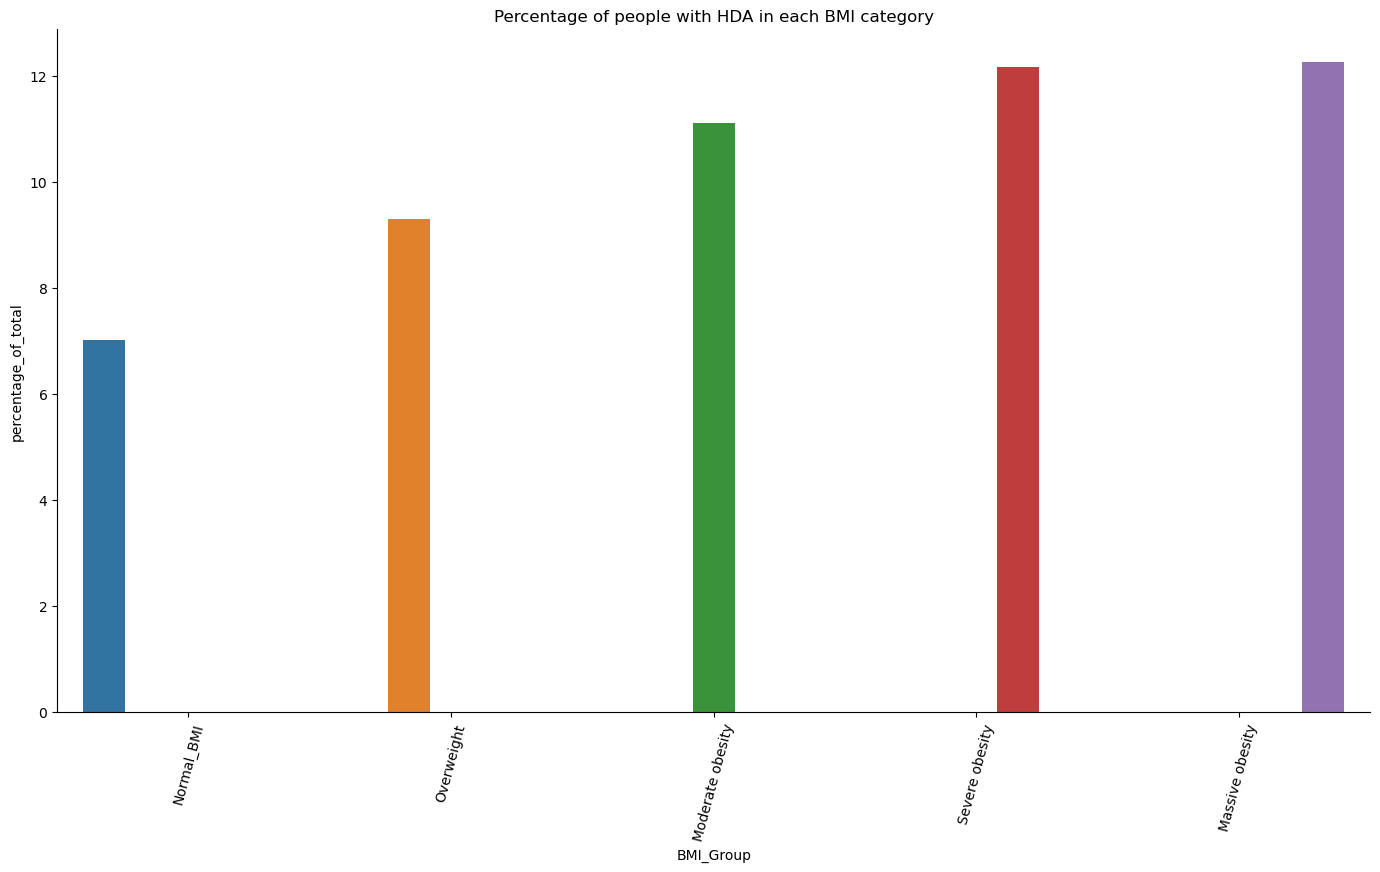

In [25]:
g = sns.catplot(kind = "bar", data = nb_of_people_with_disease_depending_on_BMI, x = "BMI_Group", y = "percentage_of_total" , hue = "BMI_Group").set(title = "Percentage of people with HDA in each BMI category")
g.fig.set_size_inches(16,8)
plt.xticks(rotation = 75)
plt.show()

We can see that moderate, severe tend to have a higher number of people that develop heart disease. The highest risk being with massive obesity.

## 3.5 Smoker

People who answered "Yes" : 1,  in this category have smoked at least 100 cigarettes in their lives.

In [26]:
smoker_check = heart_disease_dataset[["HeartDiseaseorAttack","Smoker"]]
smoker_check = pd.DataFrame(smoker_check.value_counts())
smoker_check.reset_index(inplace = True)
smoker_check.rename(columns = {0 : "Number_of_people"}, inplace = True)


#Sorting
smoker_check.sort_values(by = "Smoker", inplace = True)

#Transforming value into string to improve graph reading
smoker_check["Smoker"] = smoker_check["Smoker"].astype(str)
smoker_check["Smoker"] = smoker_check["Smoker"].replace("0.0", "Less than 100 Cigarettes").replace("1.0","More than a 100 Cigarettes")
smoker_check

,HeartDiseaseorAttack,Smoker,Number_of_people
0,0.0,Less than 100 Cigarettes,132165
3,1.0,Less than 100 Cigarettes,9092
1,0.0,More than a 100 Cigarettes,97622
2,1.0,More than a 100 Cigarettes,14801


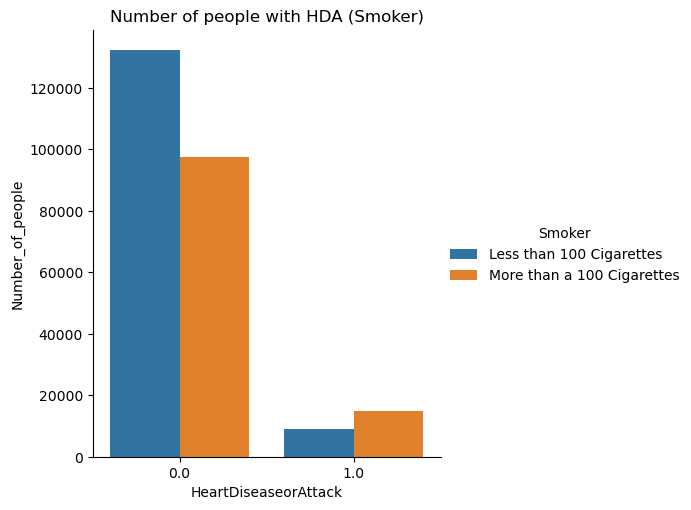

In [27]:
sns.catplot(kind = "bar", data = smoker_check, x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "Smoker").set(title = "Number of people with HDA (Smoker)")
plt.show()

In [28]:
#Total calculations 

#Finding how many people have smoked more than 100 cigarettes 
smoker_count_1 = pd.DataFrame(heart_disease_dataset["Smoker"])
smoker_is_1 = smoker_count_1[smoker_count_1["Smoker"] == 1]
smoker_is_1 = len(smoker_is_1)

#Finding how many people have smoked less than 100 cigarettes
smoker_count_0 = pd.DataFrame(heart_disease_dataset["Smoker"])
smoker_is_0 = smoker_count_0[smoker_count_0["Smoker"] == 0]
smoker_is_0 = len(smoker_is_0)

print(f"{smoker_is_0} people have smoked less than 100 cigarettes in their whole life.")
print(f"{smoker_is_1} people have smoked more than 100 cigarettes in their whole life.") 
print(f"Total number of people : {smoker_is_1 + smoker_is_0 }")

#Adding totals to the table and calculating percentages
total_smoker = [smoker_is_0, smoker_is_0, smoker_is_1, smoker_is_1]
smoker_check["total_in_each_category"] = total_smoker
smoker_check["percentage_in_each_category"] = round(smoker_check["Number_of_people"] / smoker_check["total_in_each_category"] * 100,2)
smoker_check

141257 people have smoked less than 100 cigarettes in their whole life.
112423 people have smoked more than 100 cigarettes in their whole life.
Total number of people : 253680


,HeartDiseaseorAttack,Smoker,Number_of_people,total_in_each_category,percentage_in_each_category
0,0.0,Less than 100 Cigarettes,132165,141257,93.56
3,1.0,Less than 100 Cigarettes,9092,141257,6.44
1,0.0,More than a 100 Cigarettes,97622,112423,86.83
2,1.0,More than a 100 Cigarettes,14801,112423,13.17


## 3.6 Stroke

Asking whether respondent has ever had a stroke : A sudden loss of neurological function, caused by vascular injury (loss of blood flow) to an area of the brain.
0 = Never had one
1 = Has had one

In [29]:
stroke_check = heart_disease_dataset[["HeartDiseaseorAttack","Stroke"]]
stroke_check = pd.DataFrame(stroke_check.value_counts())
stroke_check.sort_values(by = "Stroke", inplace = True)
stroke_check.reset_index(inplace = True)
stroke_check.rename(columns = {0 : "Nb_of_people_in_each_stroke_category"},inplace = True)

#Sorting
stroke_check.sort_values(by = "Stroke", inplace = True)

#Transforming value into string to improve graph reading
stroke_check["Stroke"] = stroke_check["Stroke"].astype(str)
stroke_check["Stroke"] = stroke_check["Stroke"].replace("0.0", "No Stroke").replace("1.0","Had a stroke")
stroke_check

,HeartDiseaseorAttack,Stroke,Nb_of_people_in_each_stroke_category
0,0.0,No Stroke,223432
1,1.0,No Stroke,19956
2,0.0,Had a stroke,6355
3,1.0,Had a stroke,3937


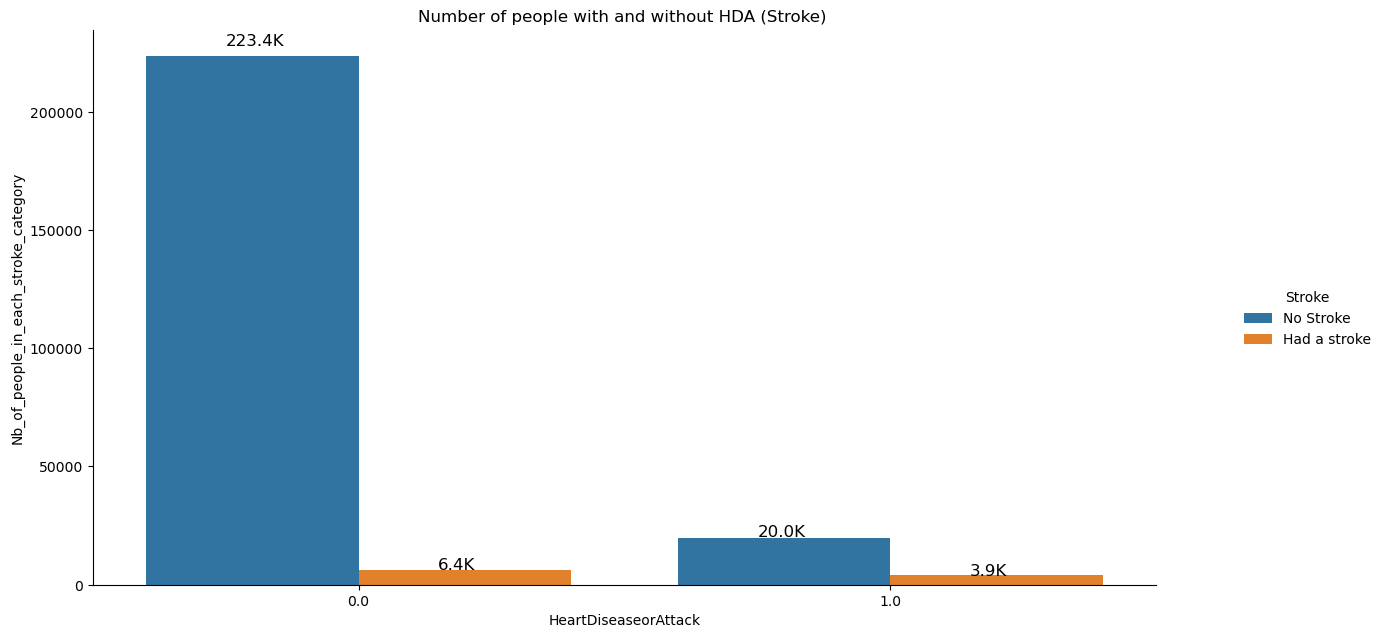

In [30]:
g = sns.catplot(kind = "bar", data = stroke_check,x = "HeartDiseaseorAttack", y = "Nb_of_people_in_each_stroke_category", hue = "Stroke").set(title = "Number of people with and without HDA (Stroke) ")
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [31]:
#Total calculations 

#Finding how many people had a stroke
stroke_count_1 = pd.DataFrame(heart_disease_dataset["Stroke"])
stroke_is_1 = stroke_count_1[stroke_count_1["Stroke"] == 1]
stroke_is_1 = len(stroke_is_1)

#Finding how many people didn't have a stroke
stroke_count_0 = pd.DataFrame(heart_disease_dataset["Stroke"])
stroke_is_0 = stroke_count_0[stroke_count_0["Stroke"] == 0]
stroke_is_0 = len(stroke_is_0)

print(f"{stroke_is_0} people never had a stroke.")
print(f"{stroke_is_1} people had a stroke.")
print(f"Total number of people : {stroke_is_1 + stroke_is_0 }")

#Adding totals to the table and calculating percentages
total = [stroke_is_0,stroke_is_0,stroke_is_1,stroke_is_1]
stroke_check["Total_in_each_stroke_category"] = total
stroke_check["Percentage"] = round(stroke_check["Nb_of_people_in_each_stroke_category"] / stroke_check["Total_in_each_stroke_category"] *100,2)
stroke_check

243388 people never had a stroke.
10292 people had a stroke.
Total number of people : 253680


,HeartDiseaseorAttack,Stroke,Nb_of_people_in_each_stroke_category,Total_in_each_stroke_category,Percentage
0,0.0,No Stroke,223432,243388,91.80
1,1.0,No Stroke,19956,243388,8.20
2,0.0,Had a stroke,6355,10292,61.75
3,1.0,Had a stroke,3937,10292,38.25


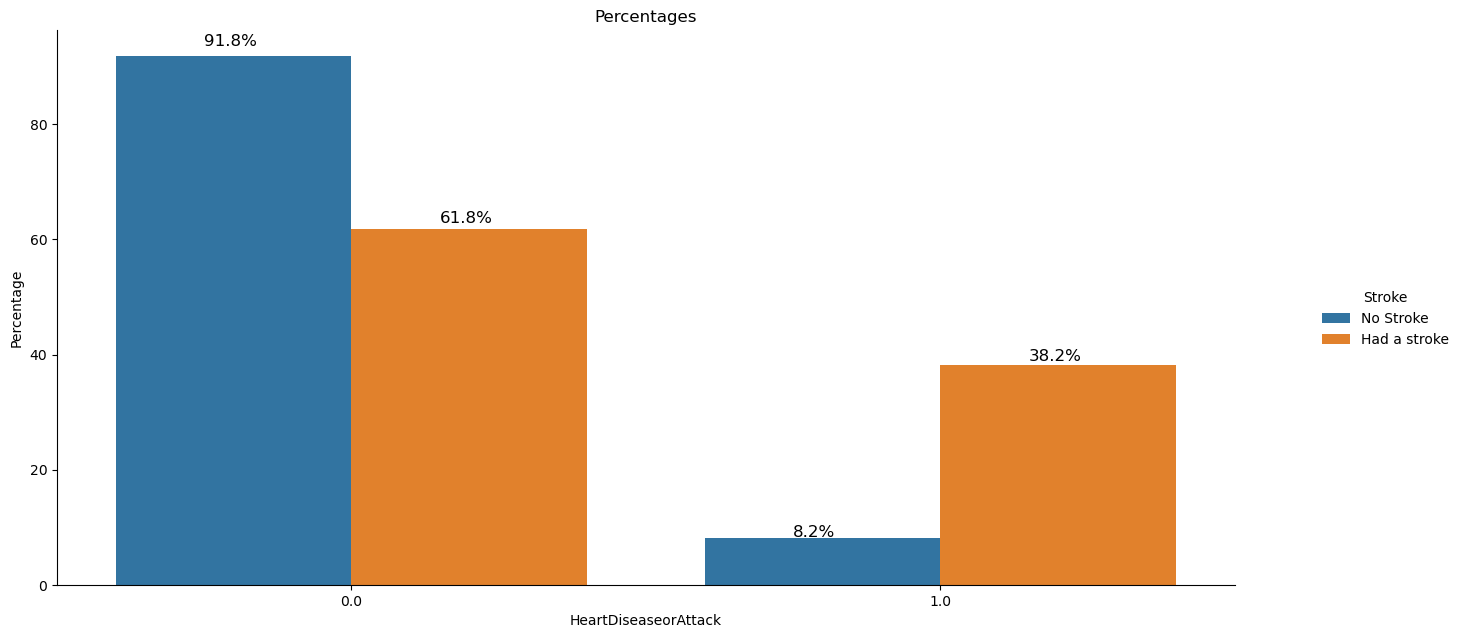

In [32]:
g = sns.catplot(kind = "bar",data =stroke_check,  x = "HeartDiseaseorAttack", y = "Percentage", hue = "Stroke").set(title = "Percentages")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.7 Diabetes

Respondents have been asked whether they had diabetes, women had a subquestion asking if the diabete was only during their pregnancy if they answered yes in the first place.

The data has been cleaned and modified to get the following output:

0 is for no diabetes or only during pregnancy

1 is for pre-diabetes or borderline diabetes

2 is for yes diabetes

In [33]:
diabetes_check = heart_disease_dataset[["HeartDiseaseorAttack","Diabetes"]]
diabetes_check = pd.DataFrame(diabetes_check.value_counts())
diabetes_check.sort_values(by = "HeartDiseaseorAttack", inplace = True)
diabetes_check.reset_index(inplace = True)
diabetes_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
diabetes_check.sort_values(by = "Diabetes", inplace = True)

#Transforming value into string to improve graph reading
diabetes_check["Diabetes"] = diabetes_check["Diabetes"].astype(str)
diabetes_check["Diabetes"] = diabetes_check["Diabetes"].replace("0.0", "No diabetes/Only during pregnancy").replace("1.0","Pre-diabetes").replace("2.0","Has diabetes")
diabetes_check

,HeartDiseaseorAttack,Diabetes,Number_of_people
0,0.0,No diabetes/Only during pregnancy,198352
3,1.0,No diabetes/Only during pregnancy,15351
2,0.0,Pre-diabetes,3967
5,1.0,Pre-diabetes,664
1,0.0,Has diabetes,27468
4,1.0,Has diabetes,7878


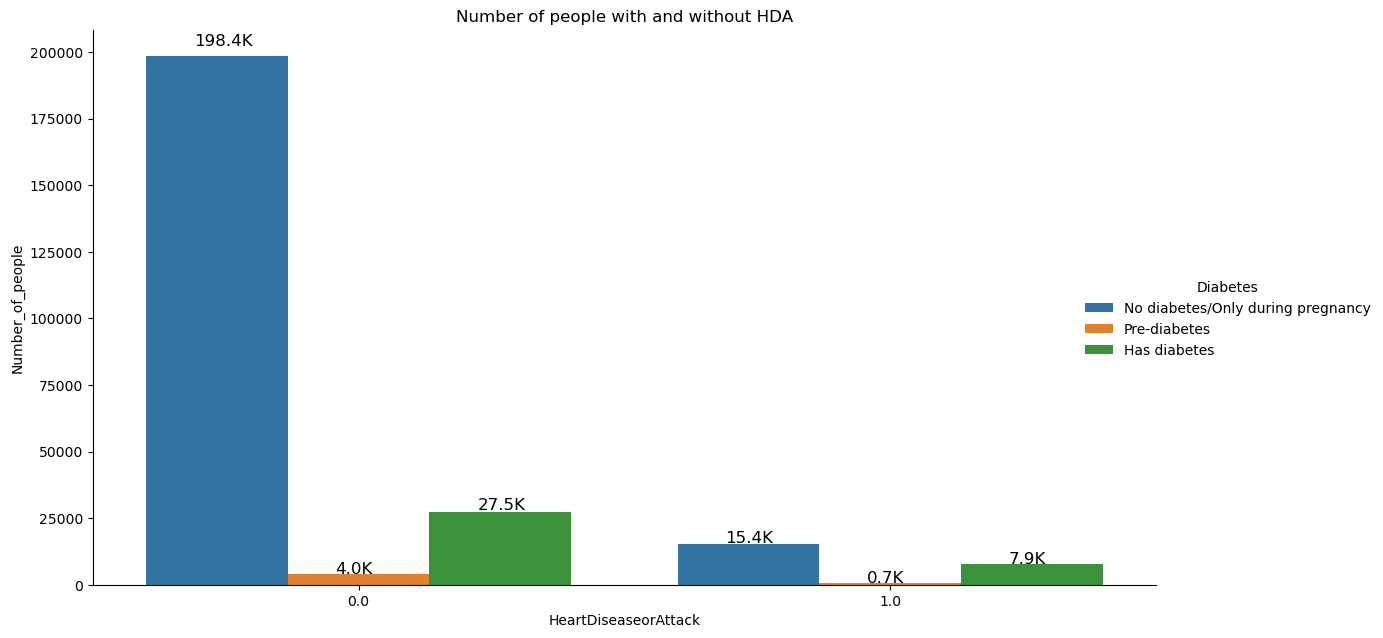

In [34]:
g = sns.catplot(kind = "bar" ,data = diabetes_check, x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "Diabetes").set(title = "Number of people with and without HDA")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.09, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
    
plt.show()

### 3.7.1 Percentages

In [35]:
#Total calculations 

#Finding how many people : "No diabetes/Only during pregnancy"
No_diabetes_count = pd.DataFrame(heart_disease_dataset["Diabetes"])
No_diabetes_count = No_diabetes_count[No_diabetes_count["Diabetes"] == 0]
No_diabetes_count = len(No_diabetes_count)

#Finding how many people : "Pre-diabetes"
pre_diabetes_count = pd.DataFrame(heart_disease_dataset["Diabetes"])
pre_diabetes_count = pre_diabetes_count[pre_diabetes_count["Diabetes"] == 1]
pre_diabetes_count = len(pre_diabetes_count)


#Finding how many people have diabetes
has_diabetes_count = pd.DataFrame(heart_disease_dataset["Diabetes"])
has_diabetes_count = has_diabetes_count[has_diabetes_count["Diabetes"] == 2]
has_diabetes_count = len(has_diabetes_count)

print(f"{No_diabetes_count} people don't have diabetes.")
print(f"{pre_diabetes_count} people have pre-diabetes.")
print(f"{has_diabetes_count} people have diabetes.")
print(f"Total number of people : {No_diabetes_count + pre_diabetes_count + has_diabetes_count }")

#Adding totals to the table and calculating percentages
total = [No_diabetes_count,No_diabetes_count,pre_diabetes_count,pre_diabetes_count,has_diabetes_count,has_diabetes_count]
diabetes_check["Total_in_each_diabetes_category"] = total

diabetes_check["Percentages"] = round(diabetes_check["Number_of_people"] / diabetes_check["Total_in_each_diabetes_category"] *100,2)
diabetes_check

213703 people don't have diabetes.
4631 people have pre-diabetes.
35346 people have diabetes.
Total number of people : 253680


,HeartDiseaseorAttack,Diabetes,Number_of_people,Total_in_each_diabetes_category,Percentages
0,0.0,No diabetes/Only during pregnancy,198352,213703,92.82
3,1.0,No diabetes/Only during pregnancy,15351,213703,7.18
2,0.0,Pre-diabetes,3967,4631,85.66
5,1.0,Pre-diabetes,664,4631,14.34
1,0.0,Has diabetes,27468,35346,77.71
4,1.0,Has diabetes,7878,35346,22.29


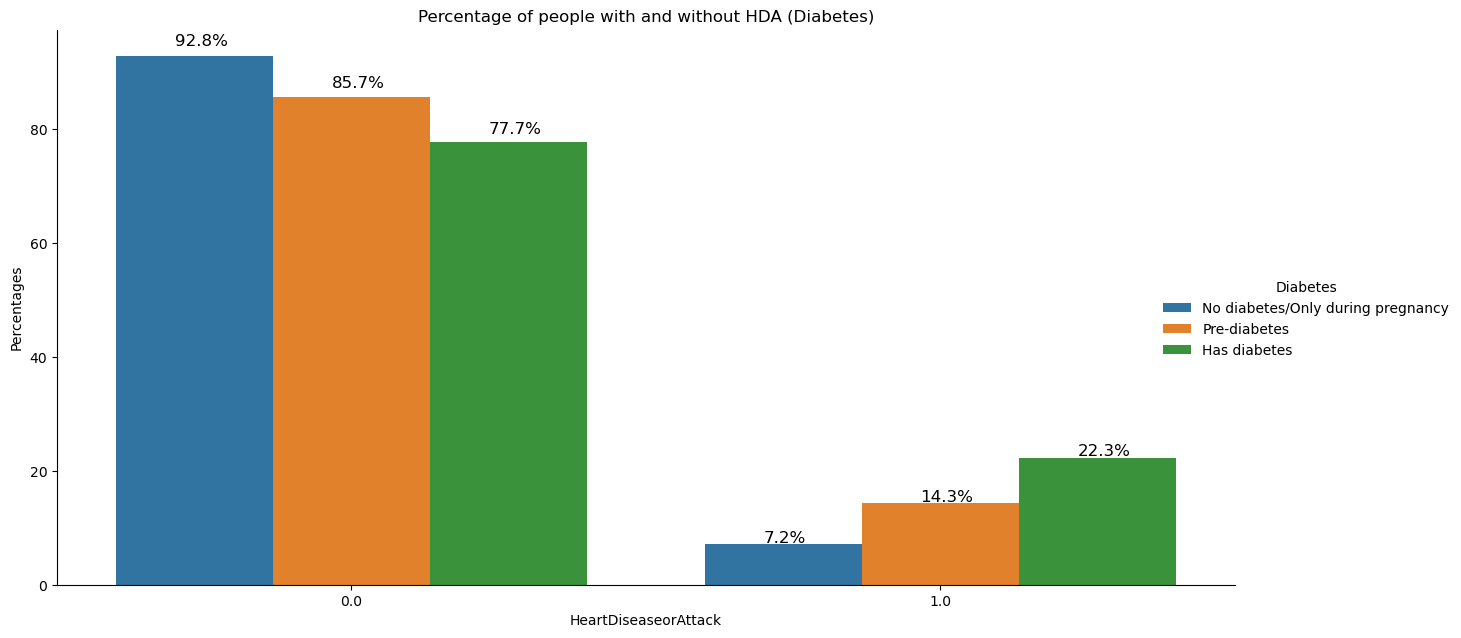

In [36]:
g = sns.catplot(kind = "bar", data = diabetes_check, x = "HeartDiseaseorAttack", y = "Percentages", hue = "Diabetes").set(title = "Percentage of people with and without HDA (Diabetes)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.10, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

Among people with no diabetes, only 7.2% reported having an HDA

Among people with pre diabetes, 14.3% reported having an HDA

Among people with "full" diabetes, 22.3% reported having an HDA

## 3.8 Physical activity

1 : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

0 : Adults who didn't report doing physical activity or exercise during the past 30 days other than their regular job

In [37]:
physA_check = heart_disease_dataset[["HeartDiseaseorAttack","PhysActivity"]]
physA_check = pd.DataFrame(physA_check.value_counts())
physA_check.sort_values(by = "HeartDiseaseorAttack", inplace = True)
physA_check.reset_index(inplace = True)
physA_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
physA_check.sort_values(by = "PhysActivity", inplace = True)

#Transforming value into string to improve graph reading
physA_check["PhysActivity"] = physA_check["PhysActivity"].astype(str)
physA_check["PhysActivity"] = physA_check["PhysActivity"].replace("0.0", "Did_not_report_PhysA").replace("1.0","ReportedPhysA")
physA_check

,HeartDiseaseorAttack,PhysActivity,Number_of_people
1,0.0,Did_not_report_PhysA,53167
3,1.0,Did_not_report_PhysA,8593
0,0.0,ReportedPhysA,176620
2,1.0,ReportedPhysA,15300


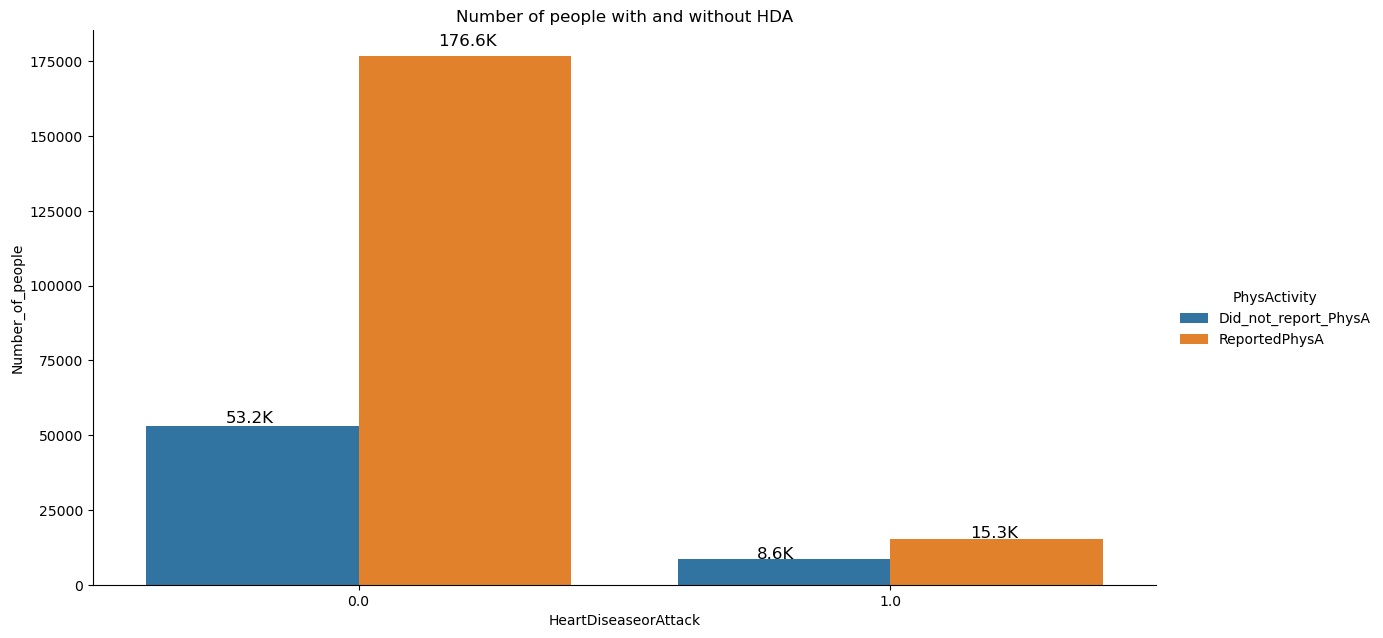

In [38]:
g = sns.catplot(kind = "bar" ,data = physA_check, x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "PhysActivity").set(title = "Number of people with and without HDA")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [39]:
#Total calculations

#Finding how many people reported physical activity"
ReportedPhysA_count = pd.DataFrame(heart_disease_dataset["PhysActivity"])
ReportedPhysA_count = ReportedPhysA_count[ReportedPhysA_count["PhysActivity"] == 1]
ReportedPhysA_count = len(ReportedPhysA_count)


#Finding how many people did not report physical activity 

Did_not_report_PhysA_count = pd.DataFrame(heart_disease_dataset["PhysActivity"])
Did_not_report_PhysA_count = Did_not_report_PhysA_count[Did_not_report_PhysA_count["PhysActivity"] == 0]
Did_not_report_PhysA_count = len(Did_not_report_PhysA_count)

print(f"{Did_not_report_PhysA_count} people did not report physical activity")
print(f"{ReportedPhysA_count} reported physical activity.")
print(f"Total number of people : {ReportedPhysA_count + Did_not_report_PhysA_count }")

#Adding totals to the table and calculating percentages
total = [Did_not_report_PhysA_count,Did_not_report_PhysA_count,ReportedPhysA_count,ReportedPhysA_count]
physA_check["Total_number_of_people_in_each_physA_category"] = total

physA_check["Percentages"] = round(physA_check["Number_of_people"] / physA_check["Total_number_of_people_in_each_physA_category"] *100,2)
physA_check.sort_values(by = "Total_number_of_people_in_each_physA_category", inplace = True)
physA_check

61760 people did not report physical activity
191920 reported physical activity.
Total number of people : 253680


,HeartDiseaseorAttack,PhysActivity,Number_of_people,Total_number_of_people_in_each_physA_category,Percentages
1,0.0,Did_not_report_PhysA,53167,61760,86.09
3,1.0,Did_not_report_PhysA,8593,61760,13.91
0,0.0,ReportedPhysA,176620,191920,92.03
2,1.0,ReportedPhysA,15300,191920,7.97


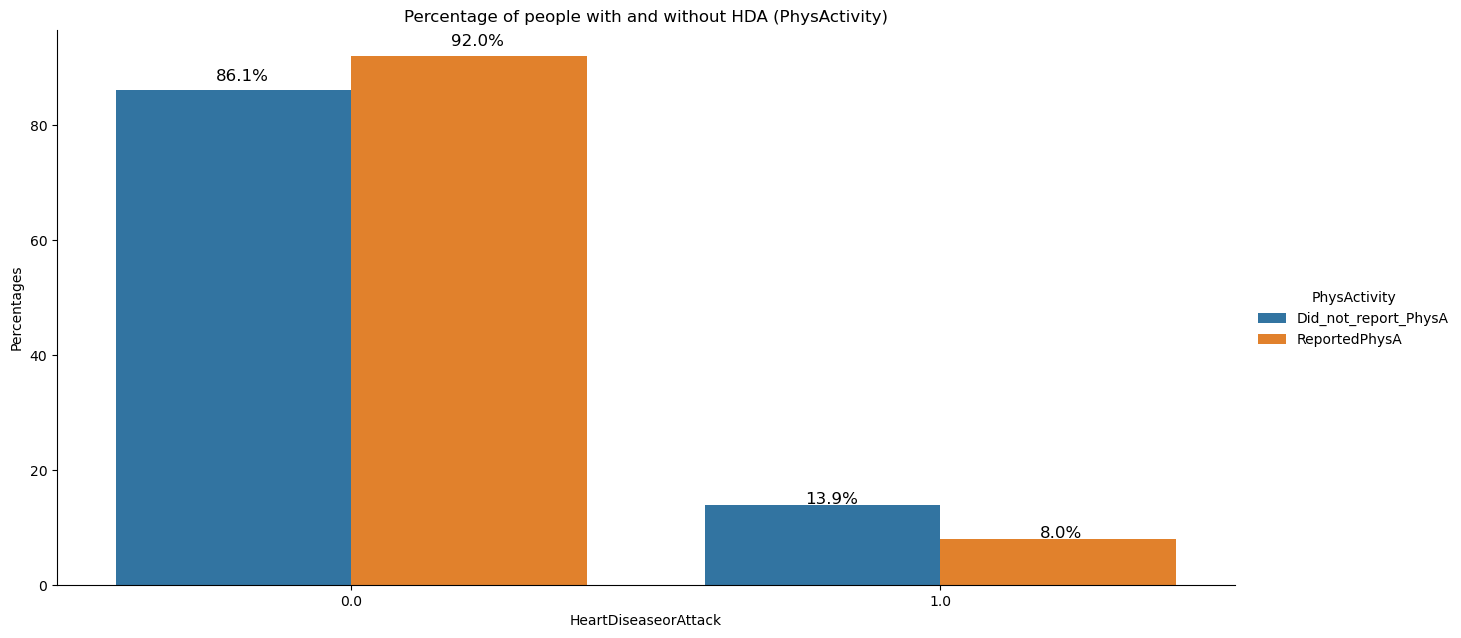

In [40]:
g = sns.catplot(kind = "bar", data = physA_check, x = "HeartDiseaseorAttack", y = "Percentages", hue = "PhysActivity").set(title = "Percentage of people with and without HDA (PhysActivity)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.17, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

Among people who reported physical activity, 8% reported having an HDA

Among people who didn't report physical activity, 13,9% reported having an HDA

## 3.9 Fruits

Whether the respondent consumes one or more fruits per day

0 : Consumes less than a fruit per day 

1 : Consumes one or more pieces of fruit per day 

In [41]:
fruit_check = heart_disease_dataset[["HeartDiseaseorAttack","Fruits"]]
fruit_check = pd.DataFrame(fruit_check.value_counts())
fruit_check.reset_index(inplace = True)
fruit_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
fruit_check.sort_values(by = "Fruits", inplace = True)

#Transforming value into string to improve graph reading
fruit_check["Fruits"] = fruit_check["Fruits"].astype(str)
fruit_check["Fruits"] = fruit_check["Fruits"].replace("0.0", "Less than one fruit a day").replace("1.0","More than one fruit a day")
fruit_check

,HeartDiseaseorAttack,Fruits,Number_of_people
1,0.0,Less than one fruit a day,83337
3,1.0,Less than one fruit a day,9445
0,0.0,More than one fruit a day,146450
2,1.0,More than one fruit a day,14448


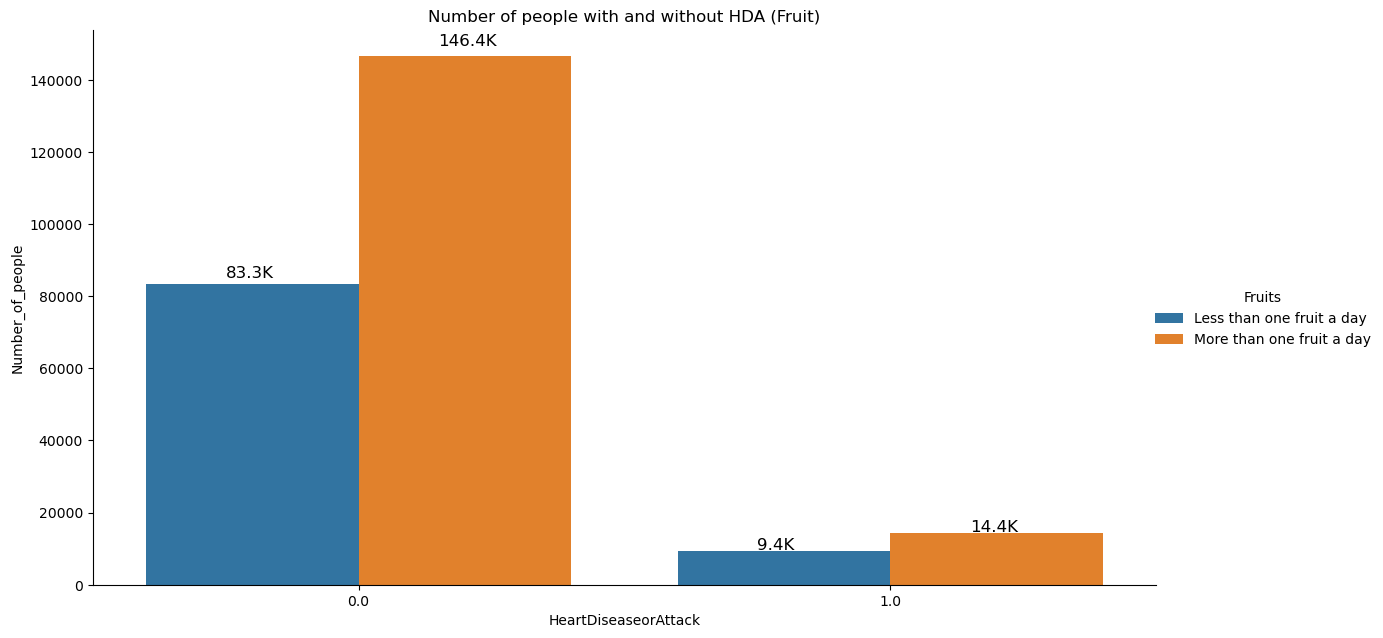

In [42]:
g = sns.catplot(kind = "bar",data = fruit_check , x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "Fruits").set(title = "Number of people with and without HDA (Fruit)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [43]:
#Total calculations

#Finding how many people reported eating more than a fruit per day
Reported_more_than_1_count = pd.DataFrame(heart_disease_dataset["Fruits"])
Reported_more_than_1_count = Reported_more_than_1_count[Reported_more_than_1_count["Fruits"] == 1]
Reported_more_than_1_count = len(Reported_more_than_1_count)

#Finding how many people reported eating less than a fruit per day

Reported_less_than_1_count = pd.DataFrame(heart_disease_dataset["Fruits"])
Reported_less_than_1_count = Reported_less_than_1_count[Reported_less_than_1_count["Fruits"] == 0]
Reported_less_than_1_count = len(Reported_less_than_1_count)

print(f"{Reported_less_than_1_count} people have reported eating less than a fruit per day.")
print(f"{Reported_more_than_1_count} people have reported eating more than a fruit per day.")
print(f"Total number of people : {Reported_more_than_1_count + Reported_less_than_1_count }")

#Adding totals to the table and calculating percentages
total = [Reported_less_than_1_count,Reported_less_than_1_count,Reported_more_than_1_count, Reported_more_than_1_count]
fruit_check["Total_number_of_people_in_each_fruit_category"] = total

fruit_check["Percentages"] = round(fruit_check["Number_of_people"] / fruit_check["Total_number_of_people_in_each_fruit_category"] *100,2)
fruit_check.sort_values(by = "Total_number_of_people_in_each_fruit_category", inplace = True)
fruit_check

92782 people have reported eating less than a fruit per day.
160898 people have reported eating more than a fruit per day.
Total number of people : 253680


,HeartDiseaseorAttack,Fruits,Number_of_people,Total_number_of_people_in_each_fruit_category,Percentages
1,0.0,Less than one fruit a day,83337,92782,89.82
3,1.0,Less than one fruit a day,9445,92782,10.18
0,0.0,More than one fruit a day,146450,160898,91.02
2,1.0,More than one fruit a day,14448,160898,8.98


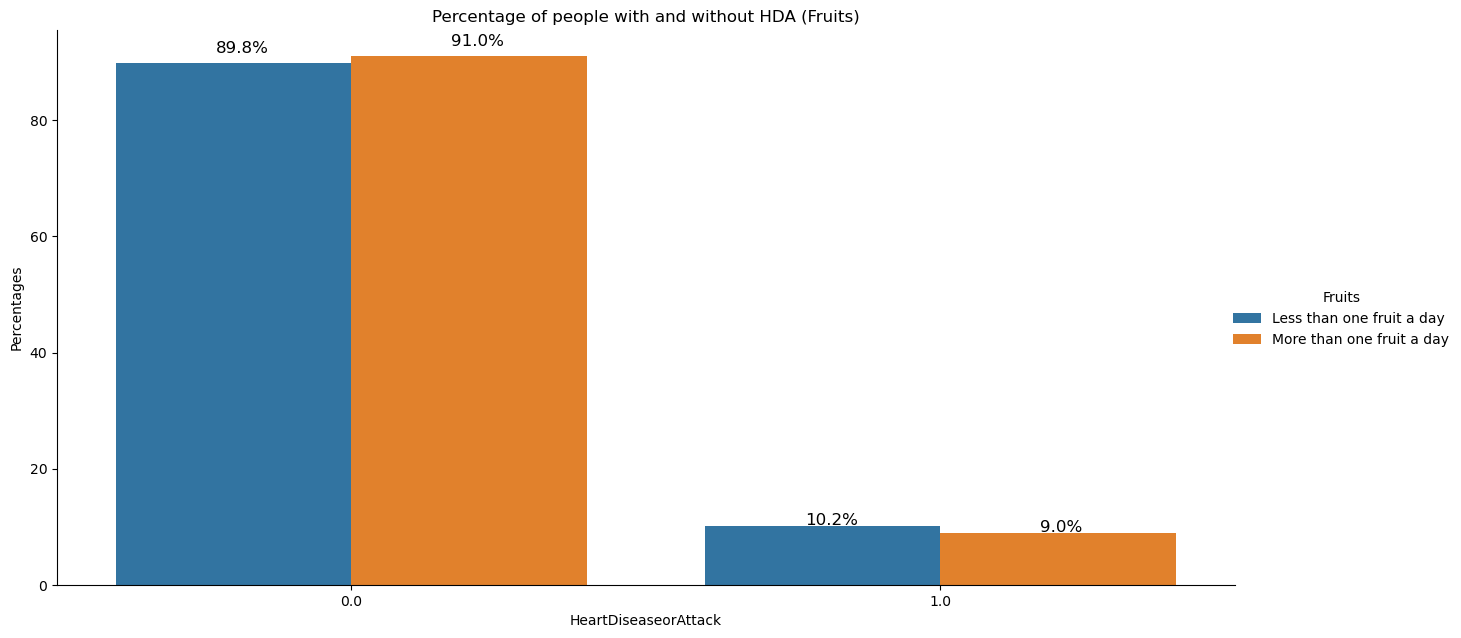

In [44]:
g = sns.catplot(kind = "bar", data = fruit_check, x = "HeartDiseaseorAttack", y = "Percentages", hue = "Fruits").set(title = "Percentage of people with and without HDA (Fruits)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.17, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.10 Vegetable

Whether the respondent consumes one or more vegetables per day

0 : Consumes less than a vegetable per day 

1 : Consumes one or more pieces of vegetable per day

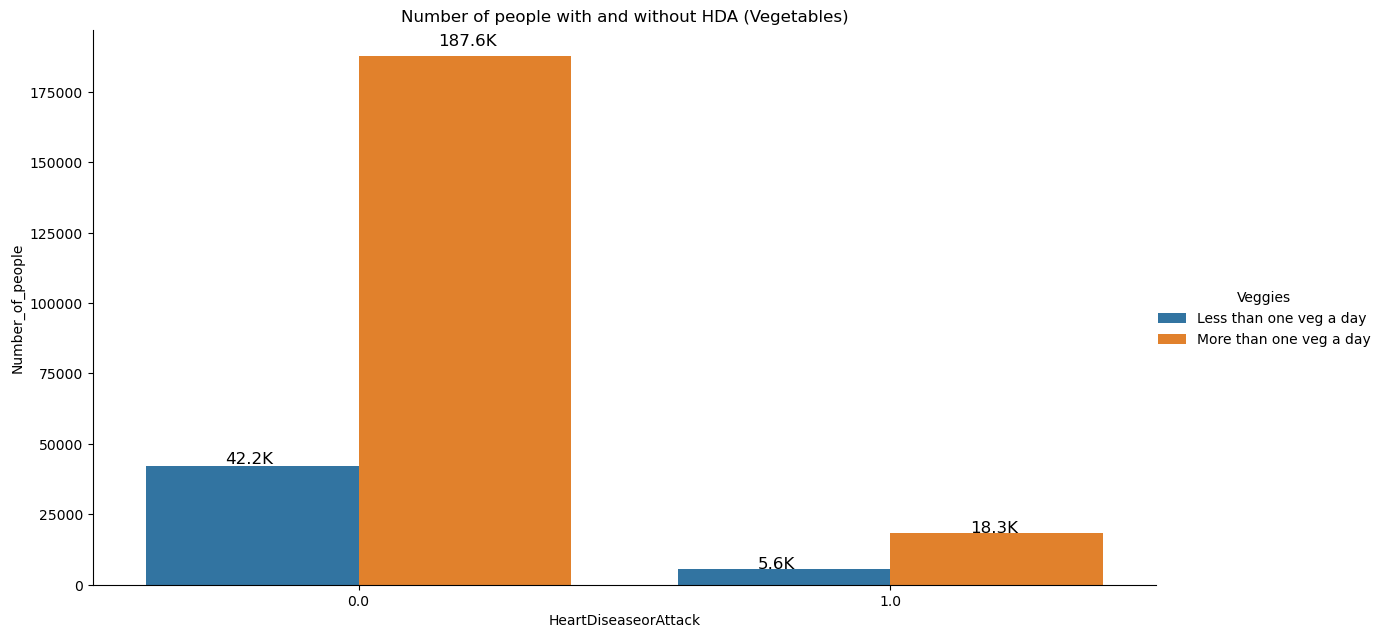

In [45]:
veggie_check = heart_disease_dataset[["HeartDiseaseorAttack","Veggies"]]
veggie_check = pd.DataFrame(veggie_check.value_counts())
veggie_check.reset_index(inplace = True)
veggie_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
veggie_check.sort_values(by = "Veggies", inplace = True)

#Transforming value into string to improve graph reading
veggie_check["Veggies"] = veggie_check["Veggies"].astype(str)
veggie_check["Veggies"] = veggie_check["Veggies"].replace("0.0", "Less than one veg a day").replace("1.0","More than one veg a day")


g = sns.catplot(kind = "bar",data = veggie_check , x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "Veggies").set(title = "Number of people with and without HDA (Vegetables)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [46]:
#Total calculations

#Finding how many people reported eating more than a fruit per day
Reported_more_than_1_veg_count = pd.DataFrame(heart_disease_dataset["Veggies"])
Reported_more_than_1_veg_count = Reported_more_than_1_veg_count[Reported_more_than_1_veg_count["Veggies"] == 1]
Reported_more_than_1_veg_count = len(Reported_more_than_1_veg_count)

#Finding how many people reported eating less than a fruit per day
Reported_less_than_1_veg_count = pd.DataFrame(heart_disease_dataset["Veggies"])
Reported_less_than_1_veg_count = Reported_less_than_1_veg_count[Reported_less_than_1_veg_count["Veggies"] == 0]
Reported_less_than_1_veg_count = len(Reported_less_than_1_veg_count)

print(f"{Reported_less_than_1_veg_count} people have reported eating less than a vegetable per day.")
print(f"{Reported_more_than_1_veg_count} people reported eating more than a vegetable per day.")
print(f"Total number of people : {Reported_more_than_1_veg_count + Reported_less_than_1_veg_count }")

#Percentages
total = [Reported_less_than_1_veg_count,Reported_less_than_1_veg_count,Reported_more_than_1_veg_count, Reported_more_than_1_veg_count]
veggie_check["Total_number_of_people_in_veggie_category"] = total
veggie_check["Percentages"] = round(veggie_check["Number_of_people"] / veggie_check["Total_number_of_people_in_veggie_category"] *100,2)
veggie_check

47839 people have reported eating less than a vegetable per day.
205841 people reported eating more than a vegetable per day.
Total number of people : 253680


,HeartDiseaseorAttack,Veggies,Number_of_people,Total_number_of_people_in_veggie_category,Percentages
1,0.0,Less than one veg a day,42198,47839,88.21
3,1.0,Less than one veg a day,5641,47839,11.79
0,0.0,More than one veg a day,187589,205841,91.13
2,1.0,More than one veg a day,18252,205841,8.87


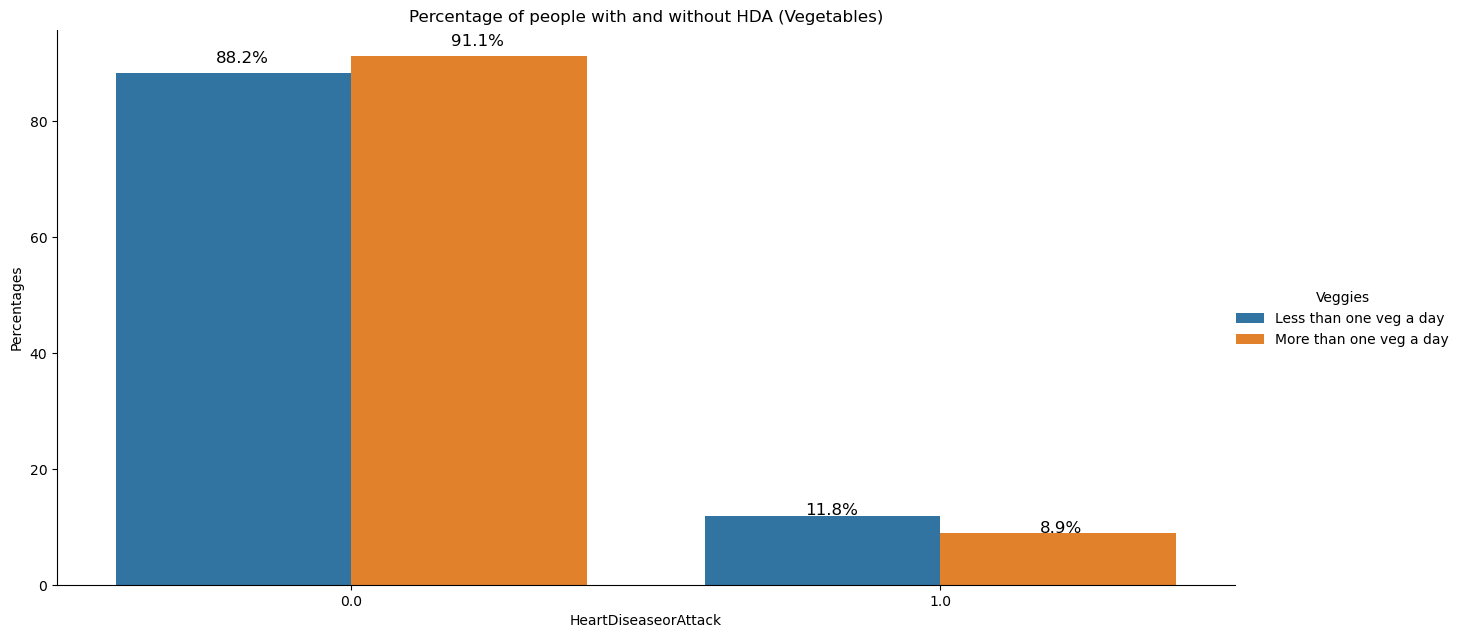

In [47]:
g = sns.catplot(kind = "bar", data = veggie_check, x = "HeartDiseaseorAttack", y = "Percentages", hue = "Veggies").set(title = "Percentage of people with and without HDA (Vegetables)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.17, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.11 Alcohol Consumption

Adult men having more than 14 drinks per week

Adult women having more than 7 drinks per week

0 : Not heavy drinker

1 : Heavy drinker

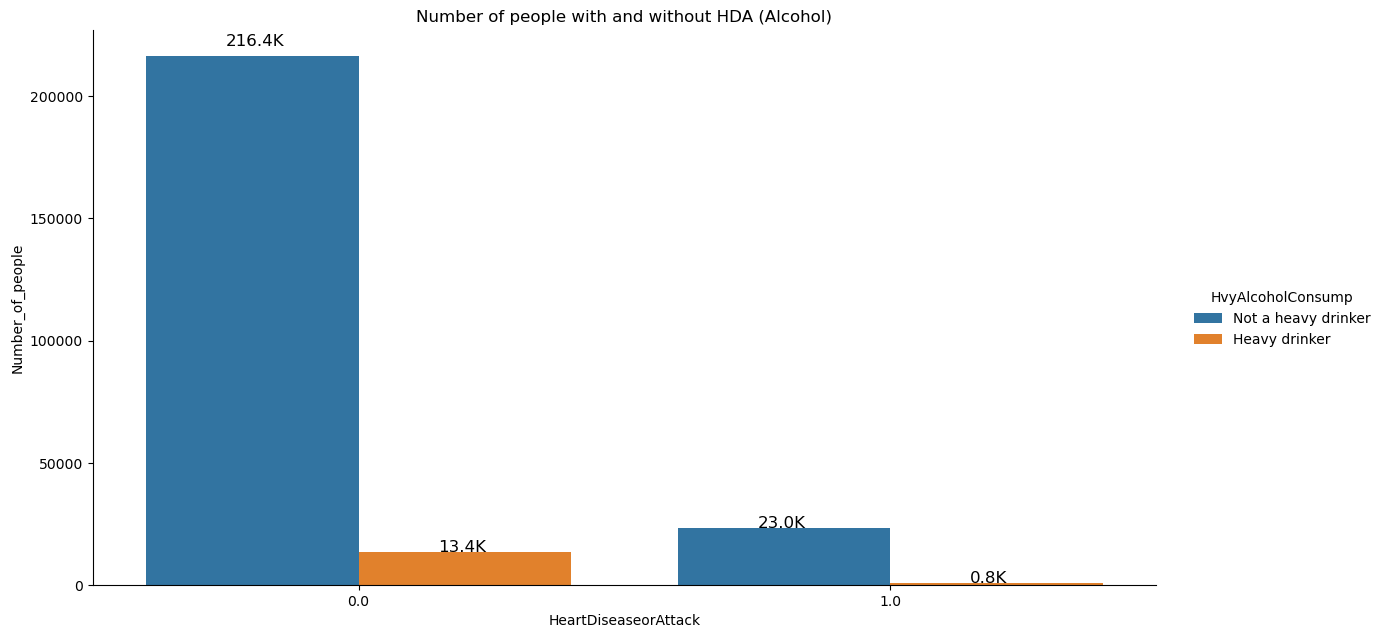

In [48]:
alcohol_check = heart_disease_dataset[["HeartDiseaseorAttack","HvyAlcoholConsump"]]
alcohol_check = pd.DataFrame(alcohol_check.value_counts())
alcohol_check.reset_index(inplace = True)
alcohol_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
alcohol_check.sort_values(by = "HvyAlcoholConsump", inplace = True)

#Transforming value into string to improve graph reading
alcohol_check["HvyAlcoholConsump"] = alcohol_check["HvyAlcoholConsump"].astype(str)
alcohol_check["HvyAlcoholConsump"] = alcohol_check["HvyAlcoholConsump"].replace("0.0", "Not a heavy drinker").replace("1.0","Heavy drinker")


g = sns.catplot(kind = "bar",data = alcohol_check , x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "HvyAlcoholConsump").set(title = "Number of people with and without HDA (Alcohol)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [49]:
#Total calculations

#Finding how many people reported drinking more than 14/7 drinks a week
heavy_drinker_count = pd.DataFrame(heart_disease_dataset["HvyAlcoholConsump"])
heavy_drinker_count = heavy_drinker_count[heavy_drinker_count["HvyAlcoholConsump"] == 1]
heavy_drinker_count = len(heavy_drinker_count)

#Finding how many people reported reported drinking less than 14/7 drinks a week
not_heavy_drinker_count = pd.DataFrame(heart_disease_dataset["HvyAlcoholConsump"])
not_heavy_drinker_count = not_heavy_drinker_count[not_heavy_drinker_count["HvyAlcoholConsump"] == 0]
not_heavy_drinker_count = len(not_heavy_drinker_count)

print(f"{not_heavy_drinker_count} people have reported drinking less than 14/7 drinks a week.")
print(f"{heavy_drinker_count} people reported drinking more than 14/7 drinks a week.")
print(f"Total number of people : {heavy_drinker_count + not_heavy_drinker_count}")

#Percentages
total = [not_heavy_drinker_count,not_heavy_drinker_count,heavy_drinker_count, heavy_drinker_count]
alcohol_check["Total_in_each_drinking_category"] = total
alcohol_check["Percentages"] = round(alcohol_check["Number_of_people"] / alcohol_check["Total_in_each_drinking_category"] *100,2)
alcohol_check

239424 people have reported drinking less than 14/7 drinks a week.
14256 people reported drinking more than 14/7 drinks a week.
Total number of people : 253680


,HeartDiseaseorAttack,HvyAlcoholConsump,Number_of_people,Total_in_each_drinking_category,Percentages
0,0.0,Not a heavy drinker,216379,239424,90.37
1,1.0,Not a heavy drinker,23045,239424,9.63
2,0.0,Heavy drinker,13408,14256,94.05
3,1.0,Heavy drinker,848,14256,5.95


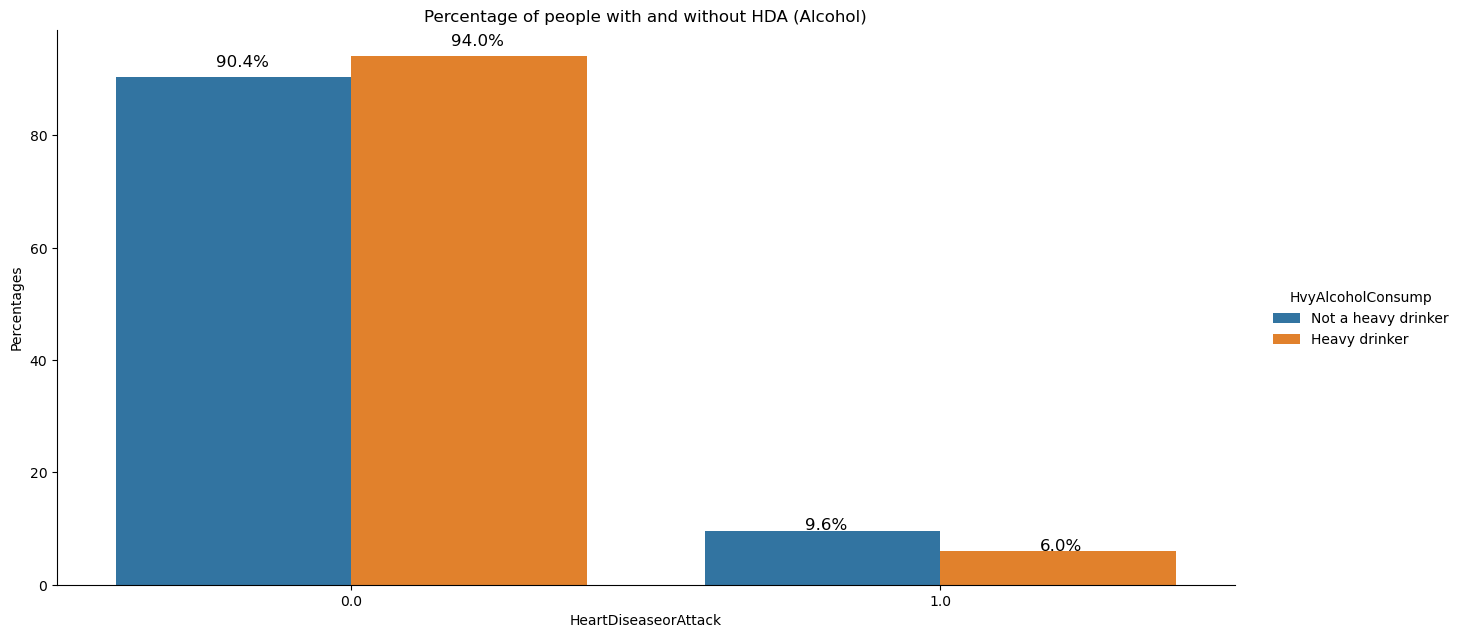

In [50]:
g = sns.catplot(kind = "bar", data = alcohol_check, x = "HeartDiseaseorAttack", y = "Percentages", hue = "HvyAlcoholConsump").set(title = "Percentage of people with and without HDA (Alcohol)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.17, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.12 Access to healthcare

Responents are asked whether they have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?

1 : Yes

0 : No healthcare access

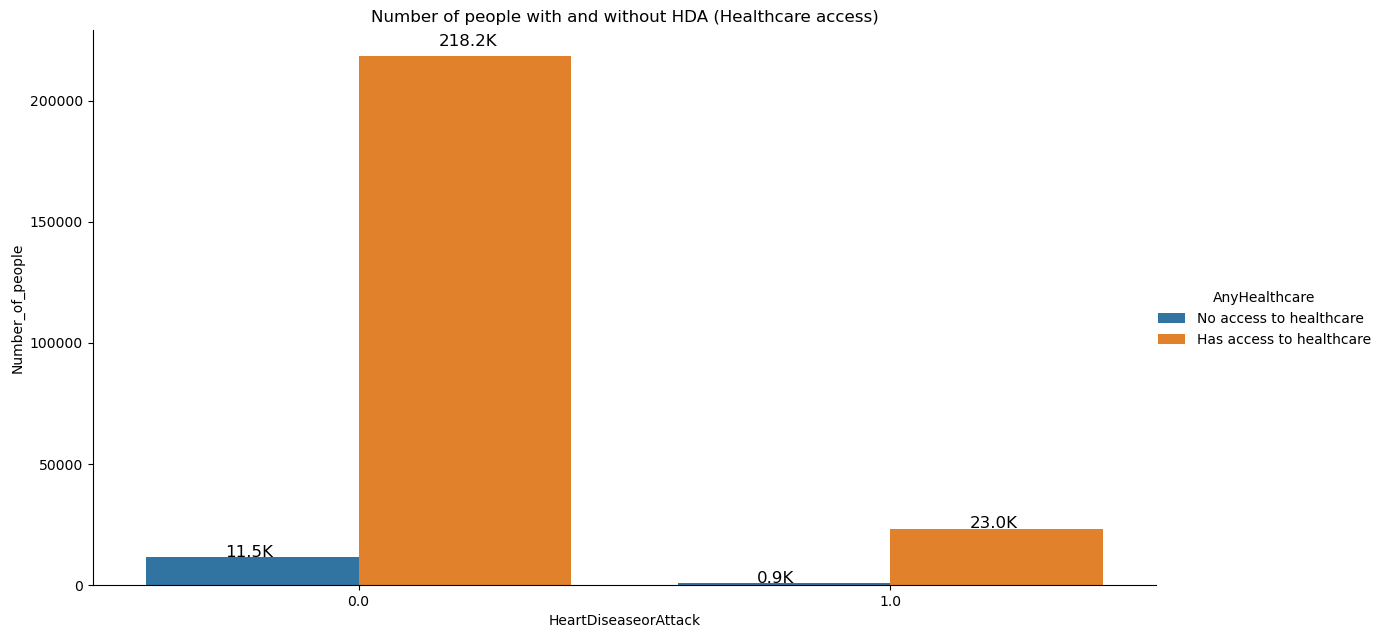

In [51]:
AnyHealthcare_check = heart_disease_dataset[["HeartDiseaseorAttack","AnyHealthcare"]]
AnyHealthcare_check = pd.DataFrame(AnyHealthcare_check.value_counts())
AnyHealthcare_check.reset_index(inplace = True)
AnyHealthcare_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
AnyHealthcare_check.sort_values(by = "AnyHealthcare", inplace = True)

#Transforming value into string to improve graph reading
AnyHealthcare_check["AnyHealthcare"] = AnyHealthcare_check["AnyHealthcare"].astype(str)
AnyHealthcare_check["AnyHealthcare"] = AnyHealthcare_check["AnyHealthcare"].replace("0.0", "No access to healthcare").replace("1.0","Has access to healthcare")


g = sns.catplot(kind = "bar",data = AnyHealthcare_check , x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "AnyHealthcare").set(title = "Number of people with and without HDA (Healthcare access)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [52]:
#Total calculations

#Finding how many people had access to a healthcare plan
access_to_healthcare_count = pd.DataFrame(heart_disease_dataset["AnyHealthcare"])
access_to_healthcare_count = access_to_healthcare_count[access_to_healthcare_count["AnyHealthcare"] == 1]
access_to_healthcare_count = len(access_to_healthcare_count)

#Finding how many people didn't have access to a healthcare plan
no_access_to_healthcare_count = pd.DataFrame(heart_disease_dataset["AnyHealthcare"])
no_access_to_healthcare_count = no_access_to_healthcare_count[no_access_to_healthcare_count["AnyHealthcare"] == 0]
no_access_to_healthcare_count = len(no_access_to_healthcare_count)

print(f"{no_access_to_healthcare_count} people don't have access to healthcare.")
print(f"{access_to_healthcare_count} people have access to healthcare.")
print(f"Total number of people : {access_to_healthcare_count + no_access_to_healthcare_count}")

#Percentages
total = [no_access_to_healthcare_count,no_access_to_healthcare_count,access_to_healthcare_count, access_to_healthcare_count]
AnyHealthcare_check["Total_in_each_healthcare_category"] = total
AnyHealthcare_check["Percentages"] = round(AnyHealthcare_check["Number_of_people"] / AnyHealthcare_check["Total_in_each_healthcare_category"] *100,2)
AnyHealthcare_check

12417 people don't have access to healthcare.
241263 people have access to healthcare.
Total number of people : 253680


,HeartDiseaseorAttack,AnyHealthcare,Number_of_people,Total_in_each_healthcare_category,Percentages
2,0.0,No access to healthcare,11547,12417,92.99
3,1.0,No access to healthcare,870,12417,7.01
0,0.0,Has access to healthcare,218240,241263,90.46
1,1.0,Has access to healthcare,23023,241263,9.54


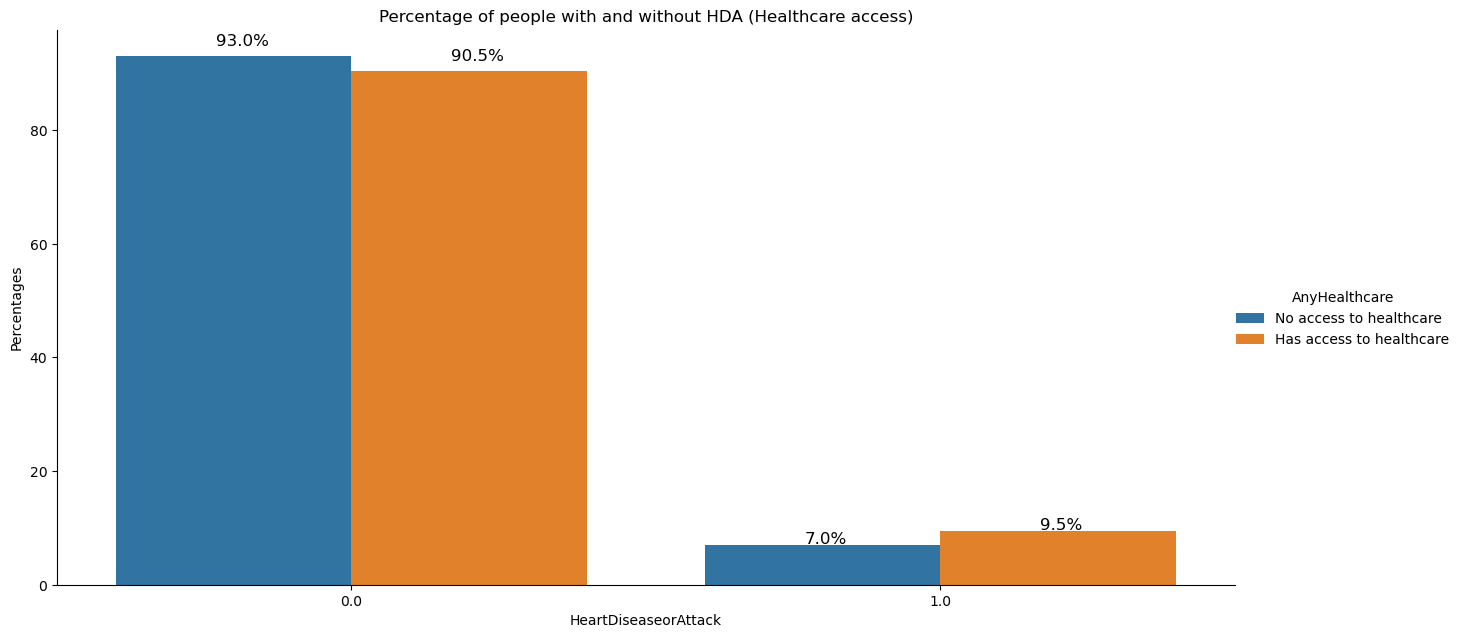

In [53]:
g = sns.catplot(kind = "bar", data = AnyHealthcare_check, x = "HeartDiseaseorAttack", y = "Percentages", hue = "AnyHealthcare").set(title = "Percentage of people with and without HDA (Healthcare access)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.17, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.13 Financial issues that prevents respondent from seeing a doctor

Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?

0 : No

1 : Yes

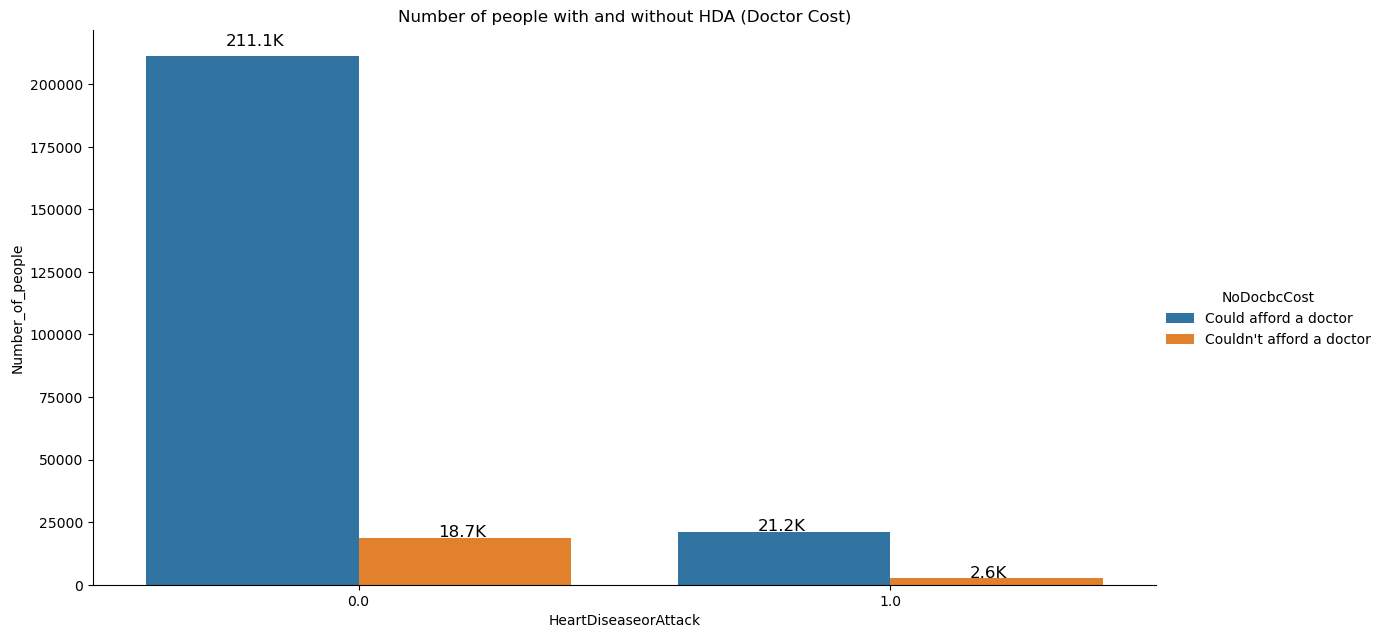

In [54]:
doc_cost_check = heart_disease_dataset[["HeartDiseaseorAttack","NoDocbcCost"]]
doc_cost_check = pd.DataFrame(doc_cost_check.value_counts())
doc_cost_check.reset_index(inplace = True)
doc_cost_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
doc_cost_check.sort_values(by = "NoDocbcCost", inplace = True)

#Transforming value into string to improve graph reading
doc_cost_check["NoDocbcCost"] = doc_cost_check["NoDocbcCost"].astype(str)
doc_cost_check["NoDocbcCost"] = doc_cost_check["NoDocbcCost"].replace("0.0", "Could afford a doctor").replace("1.0","Couldn't afford a doctor")


g = sns.catplot(kind = "bar",data = doc_cost_check , x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "NoDocbcCost").set(title = "Number of people with and without HDA (Doctor Cost)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [55]:
#Total calculations

#Finding how many people could not afford a doctor in the last 12 months
could_not_see_doctor_count = pd.DataFrame(heart_disease_dataset["NoDocbcCost"])
could_not_see_doctor_count = could_not_see_doctor_count[could_not_see_doctor_count["NoDocbcCost"] == 1]
could_not_see_doctor_count = len(could_not_see_doctor_count)

#Finding how many people could afford a doctor in the last 12 month
could_see_doctor_count = pd.DataFrame(heart_disease_dataset["NoDocbcCost"])
could_see_doctor_count = could_see_doctor_count[could_see_doctor_count["NoDocbcCost"] == 0]
could_see_doctor_count = len(could_see_doctor_count)

print(f"{could_not_see_doctor_count} people couldn't afford a doctor.")
print(f"{could_see_doctor_count} people could afford a doctor.")
print(f"Total number of people : {could_see_doctor_count + could_not_see_doctor_count}")

#Percentages
total = [could_see_doctor_count,could_see_doctor_count,could_not_see_doctor_count, could_not_see_doctor_count]
doc_cost_check["Total_in_each_doccost_category"] = total
doc_cost_check["Percentages"] = round(doc_cost_check["Number_of_people"] / doc_cost_check["Total_in_each_doccost_category"] *100,2)
doc_cost_check

21354 people couldn't afford a doctor.
232326 people could afford a doctor.
Total number of people : 253680


,HeartDiseaseorAttack,NoDocbcCost,Number_of_people,Total_in_each_doccost_category,Percentages
0,0.0,Could afford a doctor,211082,232326,90.86
1,1.0,Could afford a doctor,21244,232326,9.14
2,0.0,Couldn't afford a doctor,18705,21354,87.59
3,1.0,Couldn't afford a doctor,2649,21354,12.41


## 3.14 General Health

Would you say that in general your health is:
    
1 : Excellent 
    
5 : Very Poor 

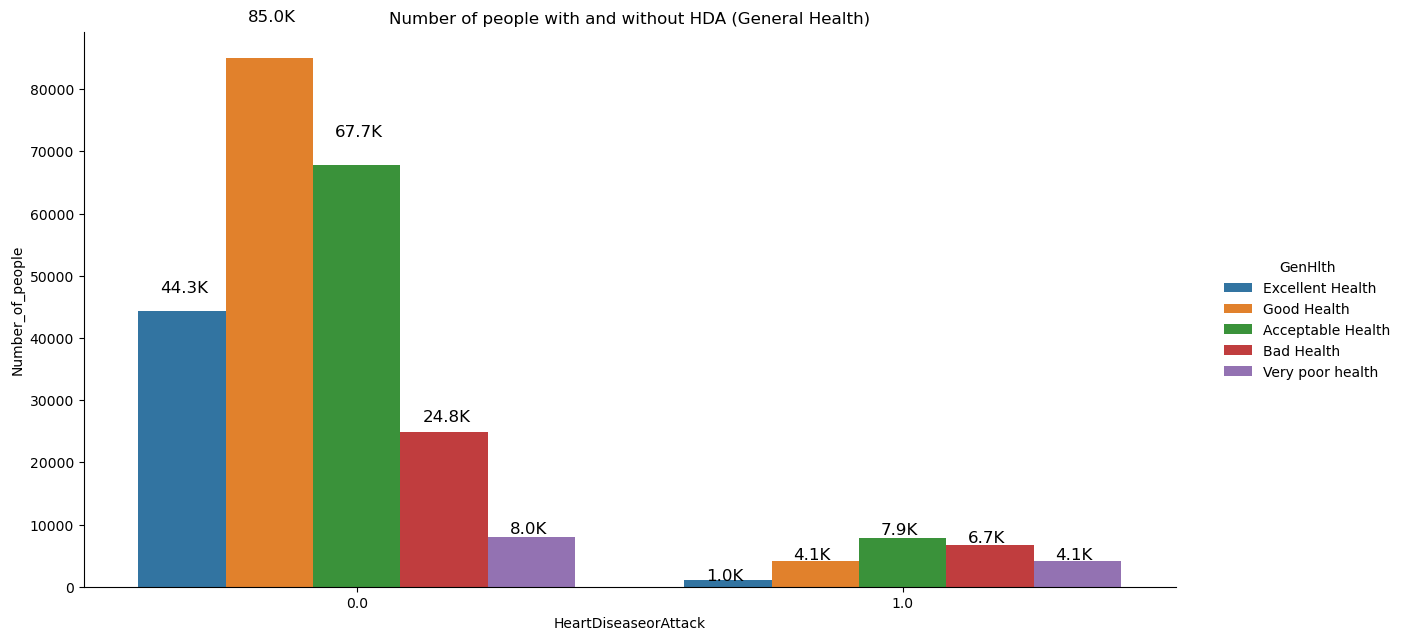

In [56]:
gen_health_check = heart_disease_dataset[["HeartDiseaseorAttack","GenHlth"]]
gen_health_check = pd.DataFrame(gen_health_check.value_counts())
gen_health_check.reset_index(inplace = True)
gen_health_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
gen_health_check.sort_values(by = "GenHlth", inplace = True)

#Transforming value into string to improve graph reading
gen_health_check["GenHlth"] = gen_health_check["GenHlth"].astype(str)
gen_health_check["GenHlth"] = gen_health_check["GenHlth"].replace("1.0", "Excellent Health").replace("2.0","Good Health").replace("3.0","Acceptable Health").replace("4.0","Bad Health").replace("5.0","Very poor health")


g = sns.catplot(kind = "bar",data = gen_health_check , x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "GenHlth").set(title = "Number of people with and without HDA (General Health)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.04, 
            p.get_height() * 1.07, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [57]:
#Total calculations

#Finding how many people have an excellent health
excellent_health_count = pd.DataFrame(heart_disease_dataset["GenHlth"])
excellent_health_count = excellent_health_count[excellent_health_count["GenHlth"] == 1]
excellent_health_count = len(excellent_health_count)

#Finding how many people have a good health
good_health_count = pd.DataFrame(heart_disease_dataset["GenHlth"])
good_health_count = good_health_count[good_health_count["GenHlth"] == 2]
good_health_count = len(good_health_count)

#Finding how many people have an acceptable health
acceptable_health_count = pd.DataFrame(heart_disease_dataset["GenHlth"])
acceptable_health_count = acceptable_health_count[acceptable_health_count["GenHlth"] == 3]
acceptable_health_count = len(acceptable_health_count)

#Finding how many people have a bad health
bad_health_count = pd.DataFrame(heart_disease_dataset["GenHlth"])
bad_health_count = bad_health_count[bad_health_count["GenHlth"] == 4]
bad_health_count = len(bad_health_count)

#Finding how many people have a very poor health
very_poor_health_count = pd.DataFrame(heart_disease_dataset["GenHlth"])
very_poor_health_count = very_poor_health_count[very_poor_health_count["GenHlth"] == 5]
very_poor_health_count = len(very_poor_health_count)


print(f"{excellent_health_count} have an excellent health.")
print(f"{good_health_count} people have a good health.")
print(f"{acceptable_health_count} people have an acceptable health.")
print(f"{bad_health_count} people have a bad health.")
print(f"{very_poor_health_count} people have a very poor health.")
print(f"Total number of people : {excellent_health_count + good_health_count+acceptable_health_count+bad_health_count+very_poor_health_count}")

#Percentages
total = [excellent_health_count,excellent_health_count,good_health_count,good_health_count,acceptable_health_count,acceptable_health_count,bad_health_count,bad_health_count,very_poor_health_count,very_poor_health_count]
gen_health_check["Total_in_each_health_level_category"] = total
gen_health_check["Percentages"] = round(gen_health_check["Number_of_people"] / gen_health_check["Total_in_each_health_level_category"] *100,2)
gen_health_check

45299 have an excellent health.
89084 people have a good health.
75646 people have an acceptable health.
31570 people have a bad health.
12081 people have a very poor health.
Total number of people : 253680


,HeartDiseaseorAttack,GenHlth,Number_of_people,Total_in_each_health_level_category,Percentages
2,0.0,Excellent Health,44283,45299,97.76
9,1.0,Excellent Health,1016,45299,2.24
0,0.0,Good Health,84956,89084,95.37
7,1.0,Good Health,4128,89084,4.63
1,0.0,Acceptable Health,67732,75646,89.54
5,1.0,Acceptable Health,7914,75646,10.46
3,0.0,Bad Health,24842,31570,78.69
6,1.0,Bad Health,6728,31570,21.31
4,0.0,Very poor health,7974,12081,66.00
8,1.0,Very poor health,4107,12081,34.00


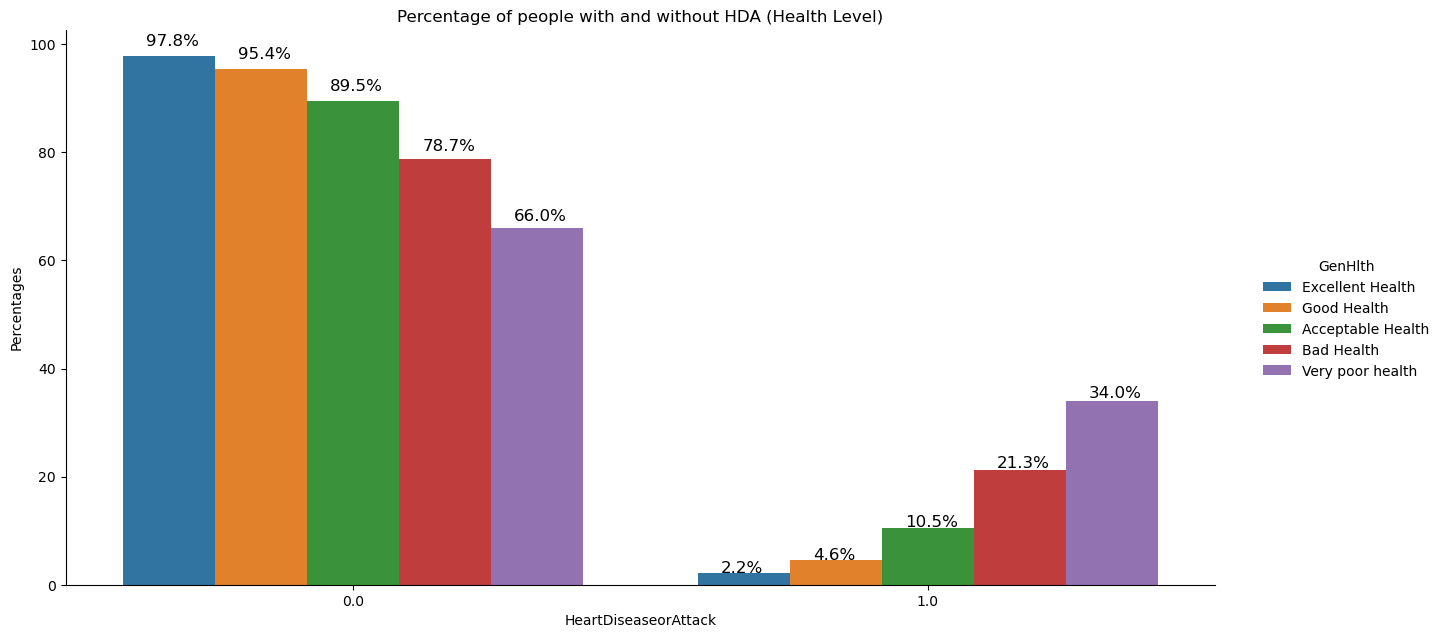

In [58]:
g = sns.catplot(kind = "bar", data = gen_health_check, x = "HeartDiseaseorAttack", y = "Percentages", hue = "GenHlth").set(title = "Percentage of people with and without HDA (Health Level)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.04, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.15 Mental Health

Thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? 

Goes from 0 to 30 days

0 : being no bad mental health days during the last month

In [59]:
#Isolationg the needed columns and sorting the values
mental_health_check = heart_disease_dataset[["HeartDiseaseorAttack","MentHlth"]]
mental_health_check.sort_values(by = "MentHlth", inplace = True)
mental_health_check

,HeartDiseaseorAttack,MentHlth
126839,0.0,0.0
153185,0.0,0.0
153186,0.0,0.0
153187,0.0,0.0
153190,0.0,0.0
...,...,...
183769,0.0,30.0
183755,0.0,30.0
183750,0.0,30.0
48452,1.0,30.0


In [60]:
#Creating Mental health groups and adding a column with the group description

no_mental_health_issues_days = mental_health_check[mental_health_check["MentHlth"] == 0]
no_mental_health_issues_days["mental_health_group"] = "No days with mental health issues"

one_to_five_days_with_mental_issues = mental_health_check.loc[(mental_health_check.MentHlth > 0) & (mental_health_check.MentHlth <= 5)]
one_to_five_days_with_mental_issues["mental_health_group"] = "One to five days"

five_to_ten_days_with_mental_health_issues = mental_health_check.loc[(mental_health_check.MentHlth > 5) & (mental_health_check.MentHlth <= 10)]
five_to_ten_days_with_mental_health_issues["mental_health_group"] = "Five to ten days"

ten_to_fifteen_days_with_mental_health_issues = mental_health_check.loc[(mental_health_check.MentHlth > 10) & (mental_health_check.MentHlth <= 15)]
ten_to_fifteen_days_with_mental_health_issues["mental_health_group"] = "Ten to fifteen days"

fifteen_to_twenty_days_with_mental_health_issues = mental_health_check.loc[(mental_health_check.MentHlth > 15) & (mental_health_check.MentHlth <= 20)]
fifteen_to_twenty_days_with_mental_health_issues["mental_health_group"] = "Fifteen to twenty days"

twenty_to_twentyfive_days_with_mental_health_issues = mental_health_check.loc[(mental_health_check.MentHlth > 20) & (mental_health_check.MentHlth <= 25)]
twenty_to_twentyfive_days_with_mental_health_issues["mental_health_group"] = "Twenty to twenty-five days"

twentyfive_to_thirty_days_with_mental_health_issues = mental_health_check.loc[(mental_health_check.MentHlth > 25) & (mental_health_check.MentHlth <= 30)]
twentyfive_to_thirty_days_with_mental_health_issues["mental_health_group"] = "Twenty-five to thirty days"


#Appending the dataframes together for visualisation
all_mental_health = no_mental_health_issues_days.append(one_to_five_days_with_mental_issues).append(five_to_ten_days_with_mental_health_issues).append(ten_to_fifteen_days_with_mental_health_issues).append(fifteen_to_twenty_days_with_mental_health_issues).append(twenty_to_twentyfive_days_with_mental_health_issues).append(twentyfive_to_thirty_days_with_mental_health_issues)
all_mental_health.sample(25)

,HeartDiseaseorAttack,MentHlth,mental_health_group
84768,0.0,0.0,No days with mental health issues
87724,0.0,0.0,No days with mental health issues
71668,0.0,0.0,No days with mental health issues
43822,0.0,0.0,No days with mental health issues
154549,0.0,7.0,Five to ten days
231095,0.0,0.0,No days with mental health issues
91203,0.0,0.0,No days with mental health issues
246808,0.0,0.0,No days with mental health issues
7615,0.0,0.0,No days with mental health issues
131890,0.0,0.0,No days with mental health issues


In [61]:
#Creating the needed dataframe to plot
nb_of_people_depending_on_mental_health_level = all_mental_health.groupby("MentHlth").value_counts().to_frame()
nb_of_people_depending_on_mental_health_level = pd.DataFrame(nb_of_people_depending_on_mental_health_level)
nb_of_people_depending_on_mental_health_level.reset_index(inplace = True)
nb_of_people_depending_on_mental_health_level.drop(columns = ["MentHlth"], inplace = True)
nb_of_people_depending_on_mental_health_level.columns = ["HeartDiseaseorAttack","mental_health_group","Nb_of_people"]

nb_of_people_depending_on_mental_health_level = nb_of_people_depending_on_mental_health_level.groupby(["mental_health_group","HeartDiseaseorAttack"]).sum()
nb_of_people_depending_on_mental_health_level.reset_index(inplace = True)
nb_of_people_depending_on_mental_health_level
#The total number of people is 253 680, as expected

,mental_health_group,HeartDiseaseorAttack,Nb_of_people
0,Fifteen to twenty days,0.0,3112
1,Fifteen to twenty days,1.0,507
2,Five to ten days,0.0,10038
3,Five to ten days,1.0,1153
4,No days with mental health issues,0.0,159876
5,No days with mental health issues,1.0,15804
6,One to five days,0.0,38608
7,One to five days,1.0,3184
8,Ten to fifteen days,0.0,6243
9,Ten to fifteen days,1.0,909


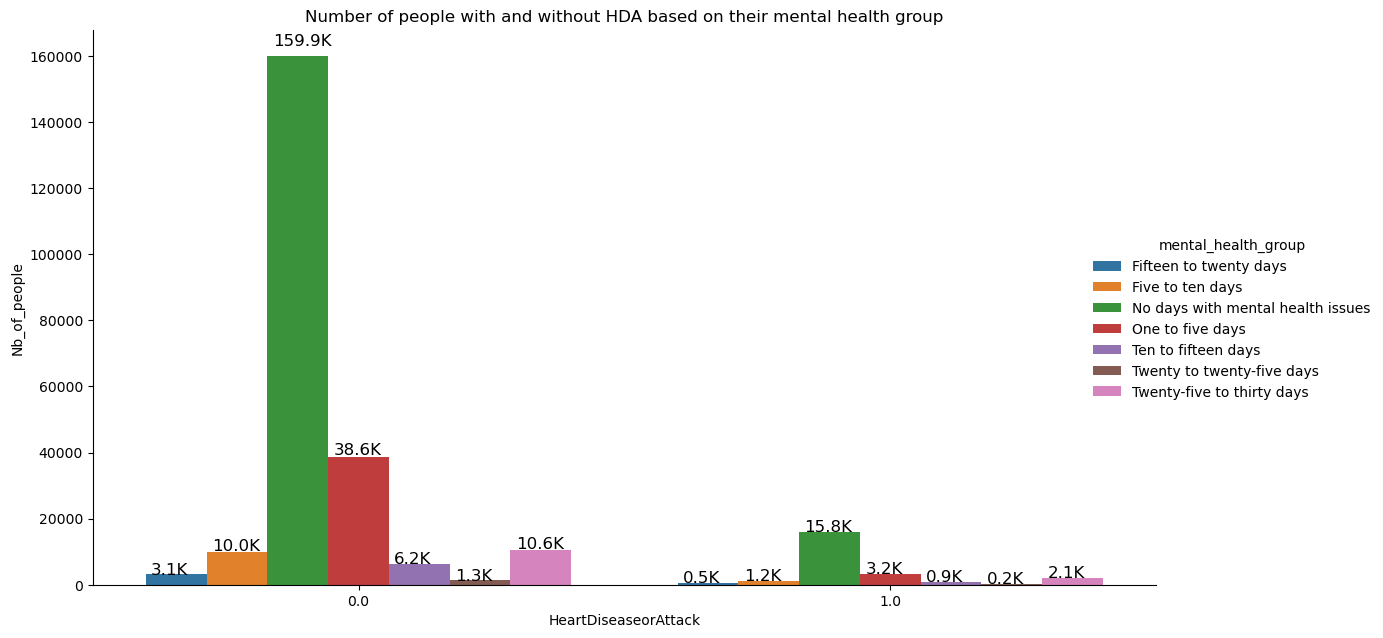

In [62]:
g = sns.catplot(kind='bar', data=nb_of_people_depending_on_mental_health_level, x='HeartDiseaseorAttack', y='Nb_of_people', hue = 'mental_health_group').set(title = "Number of people with and without HDA based on their mental health group")
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [63]:
#Total calculations
no_mental_health_issues_total = all_mental_health[all_mental_health["mental_health_group"] == "No days with mental health issues"]
no_mental_health_issues_total = len(no_mental_health_issues_total)

one_to_five_days_with_mental_issues_total= all_mental_health[all_mental_health["mental_health_group"] == "One to five days"]
one_to_five_days_with_mental_issues_total = len(one_to_five_days_with_mental_issues_total)

five_to_ten_days_with_mental_health_issues_total = all_mental_health[all_mental_health["mental_health_group"] == "Five to ten days"]
five_to_ten_days_with_mental_health_issues_total = len(five_to_ten_days_with_mental_health_issues_total)

ten_to_fifteen_days_with_mental_health_issues_total = all_mental_health[all_mental_health["mental_health_group"] == "Ten to fifteen days"]
ten_to_fifteen_days_with_mental_health_issues_total = len(ten_to_fifteen_days_with_mental_health_issues_total)

fifteen_to_twenty_days_with_mental_health_issues_total = all_mental_health[all_mental_health["mental_health_group"] == "Fifteen to twenty days"]
fifteen_to_twenty_days_with_mental_health_issues_total = len(fifteen_to_twenty_days_with_mental_health_issues_total)

twenty_to_twentyfive_days_with_mental_health_issues_total = all_mental_health[all_mental_health["mental_health_group"] == "Twenty to twenty-five days"]
twenty_to_twentyfive_days_with_mental_health_issues_total = len(twenty_to_twentyfive_days_with_mental_health_issues_total)

twentyfive_to_thirty_days_with_mental_health_issues_total = all_mental_health[all_mental_health["mental_health_group"] == "Twenty-five to thirty days"]
twentyfive_to_thirty_days_with_mental_health_issues_total = len(twentyfive_to_thirty_days_with_mental_health_issues_total)



print(f"{no_mental_health_issues_total} people did not have mental health issues during the past month")
print(f"{one_to_five_days_with_mental_issues_total} people had 1 to 5 days of mental health issues during the past month")
print(f"{five_to_ten_days_with_mental_health_issues_total} people had 5 to 10 days of mental health issues during the past month")
print(f"{ten_to_fifteen_days_with_mental_health_issues_total} people had 10 to 15 days of mental health issues during the past month.")
print(f"{fifteen_to_twenty_days_with_mental_health_issues_total} people had 15 to 20 days of mental health issues during the past month")
print(f"{twenty_to_twentyfive_days_with_mental_health_issues_total} people had 20 to 25 days of mental health issues during the past month.")
print(f"{twentyfive_to_thirty_days_with_mental_health_issues_total} people had 25 to 30 days of mental health issues during the past month.")


print(f"Total number of people : {no_mental_health_issues_total + one_to_five_days_with_mental_issues_total + five_to_ten_days_with_mental_health_issues_total + ten_to_fifteen_days_with_mental_health_issues_total + fifteen_to_twenty_days_with_mental_health_issues_total+twenty_to_twentyfive_days_with_mental_health_issues_total+ twentyfive_to_thirty_days_with_mental_health_issues_total}")


'''Since the Mthl column has become, mental_health_group, the df is now sorting by mental_health_group in alphabetical order.
I now need to add the total in this order to add the right values in the output'''

#Adding totals of each category to the table
total = [fifteen_to_twenty_days_with_mental_health_issues_total,fifteen_to_twenty_days_with_mental_health_issues_total,five_to_ten_days_with_mental_health_issues_total,five_to_ten_days_with_mental_health_issues_total,no_mental_health_issues_total,no_mental_health_issues_total,one_to_five_days_with_mental_issues_total,one_to_five_days_with_mental_issues_total,ten_to_fifteen_days_with_mental_health_issues_total,ten_to_fifteen_days_with_mental_health_issues_total,twenty_to_twentyfive_days_with_mental_health_issues_total,twenty_to_twentyfive_days_with_mental_health_issues_total,twentyfive_to_thirty_days_with_mental_health_issues_total,twentyfive_to_thirty_days_with_mental_health_issues_total]
nb_of_people_depending_on_mental_health_level["total"] = total

#Transforming the new column into the right type to calculate the percentage
nb_of_people_depending_on_mental_health_level["total"] = nb_of_people_depending_on_mental_health_level["total"].astype(int)
nb_of_people_depending_on_mental_health_level["percentage_of_total"] = round(nb_of_people_depending_on_mental_health_level["Nb_of_people"] / nb_of_people_depending_on_mental_health_level["total"]*100,2)

#Dropping columns to facilitate graph reading
nb_of_people_depending_on_mental_health_level = nb_of_people_depending_on_mental_health_level[nb_of_people_depending_on_mental_health_level["HeartDiseaseorAttack"] == 1]
nb_of_people_depending_on_mental_health_level

175680 people did not have mental health issues during the past month
41792 people had 1 to 5 days of mental health issues during the past month
11191 people had 5 to 10 days of mental health issues during the past month
7152 people had 10 to 15 days of mental health issues during the past month.
3619 people had 15 to 20 days of mental health issues during the past month
1549 people had 20 to 25 days of mental health issues during the past month.
12697 people had 25 to 30 days of mental health issues during the past month.
Total number of people : 253680


,mental_health_group,HeartDiseaseorAttack,Nb_of_people,total,percentage_of_total
1,Fifteen to twenty days,1.0,507,3619,14.01
3,Five to ten days,1.0,1153,11191,10.30
5,No days with mental health issues,1.0,15804,175680,9.00
7,One to five days,1.0,3184,41792,7.62
9,Ten to fifteen days,1.0,909,7152,12.71
11,Twenty to twenty-five days,1.0,238,1549,15.36
13,Twenty-five to thirty days,1.0,2098,12697,16.52


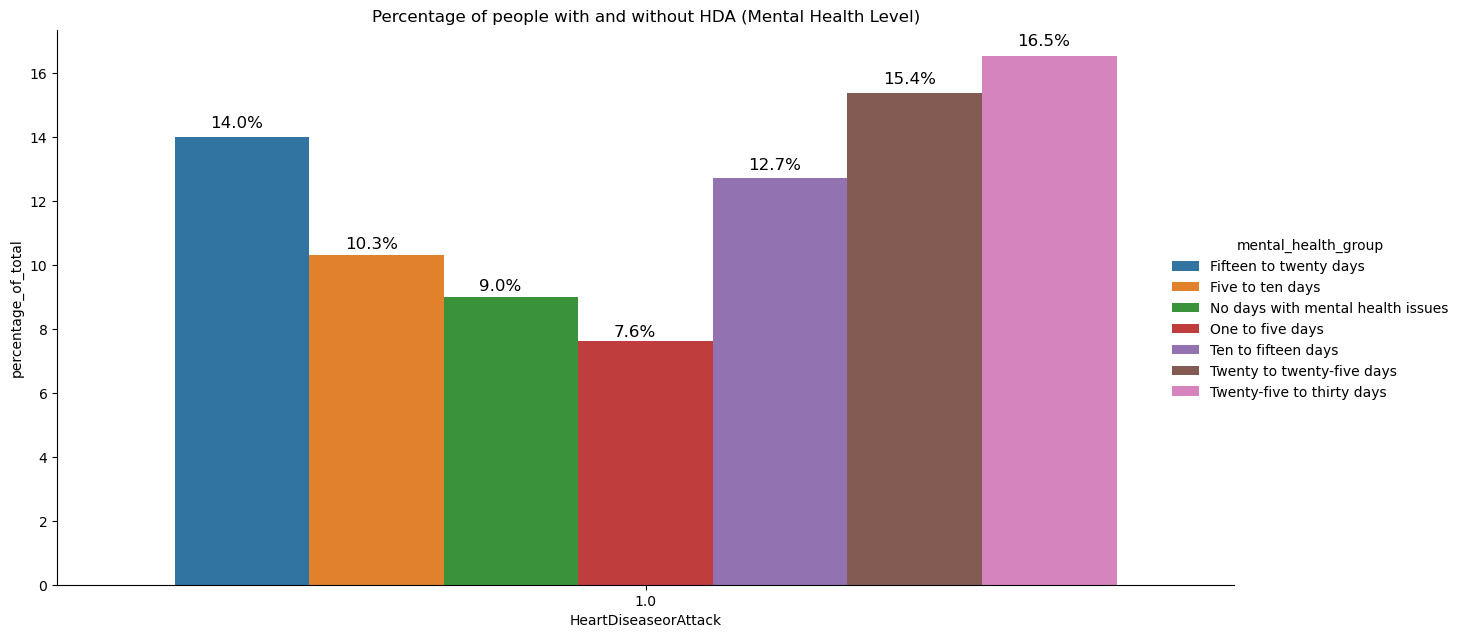

In [64]:
g = sns.catplot(kind = "bar", data = nb_of_people_depending_on_mental_health_level, x = "HeartDiseaseorAttack", y = "percentage_of_total", hue = "mental_health_group").set(title = "Percentage of people with and without HDA (Mental Health Level)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.03, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.16 Physical Health

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

Goes from 0 to 30

0 : being no bad physical health days during the last month

In [65]:
#Isolationg the needed columns and sorting the values
phys_health_check = heart_disease_dataset[["HeartDiseaseorAttack","PhysHlth"]]
phys_health_check.sort_values(by = "PhysHlth", inplace = True)
phys_health_check

,HeartDiseaseorAttack,PhysHlth
126839,0.0,0.0
149112,0.0,0.0
149113,0.0,0.0
149116,0.0,0.0
149118,0.0,0.0
...,...,...
151277,0.0,30.0
16517,0.0,30.0
151283,0.0,30.0
227178,0.0,30.0


In [66]:
#Creating Mental health groups and adding a column with the group description

no_phys_health_issues_days = phys_health_check[phys_health_check["PhysHlth"] == 0]
no_phys_health_issues_days["phys_health_group"] = "No days with physical health issues"

one_to_five_days_with_phys_issues = phys_health_check.loc[(phys_health_check.PhysHlth > 0) & (phys_health_check.PhysHlth <= 5)]
one_to_five_days_with_phys_issues["phys_health_group"] = "One to five days"

five_to_ten_days_with_phys_health_issues = phys_health_check.loc[(phys_health_check.PhysHlth > 5) & (phys_health_check.PhysHlth <= 10)]
five_to_ten_days_with_phys_health_issues["phys_health_group"] = "Five to ten days"

ten_to_fifteen_days_with_phys_health_issues = phys_health_check.loc[(phys_health_check.PhysHlth > 10) & (phys_health_check.PhysHlth <= 15)]
ten_to_fifteen_days_with_phys_health_issues["phys_health_group"] = "Ten to fifteen days"

fifteen_to_twenty_days_with_phys_health_issues = phys_health_check.loc[(phys_health_check.PhysHlth > 15) & (phys_health_check.PhysHlth <= 20)]
fifteen_to_twenty_days_with_phys_health_issues["phys_health_group"] = "Fifteen to twenty days"

twenty_to_twentyfive_days_with_phys_health_issues = phys_health_check.loc[(phys_health_check.PhysHlth > 20) & (phys_health_check.PhysHlth <= 25)]
twenty_to_twentyfive_days_with_phys_health_issues["phys_health_group"] = "Twenty to twenty-five days"

twentyfive_to_thirty_days_with_phys_health_issues = phys_health_check.loc[(phys_health_check.PhysHlth > 25) & (phys_health_check.PhysHlth <= 30)]
twentyfive_to_thirty_days_with_phys_health_issues["phys_health_group"] = "Twenty-five to thirty days"


#Appending the dataframes together for visualisation
all_phys_health = no_phys_health_issues_days.append(one_to_five_days_with_phys_issues).append(five_to_ten_days_with_phys_health_issues).append(ten_to_fifteen_days_with_phys_health_issues).append(fifteen_to_twenty_days_with_phys_health_issues).append(twenty_to_twentyfive_days_with_phys_health_issues).append(twentyfive_to_thirty_days_with_phys_health_issues)
all_phys_health.sample(25)

,HeartDiseaseorAttack,PhysHlth,phys_health_group
238890,0.0,15.0,Ten to fifteen days
99972,1.0,5.0,One to five days
167699,1.0,5.0,One to five days
246577,0.0,17.0,Fifteen to twenty days
60830,0.0,0.0,No days with physical health issues
195257,0.0,5.0,One to five days
8986,1.0,20.0,Fifteen to twenty days
135550,0.0,0.0,No days with physical health issues
138404,0.0,0.0,No days with physical health issues
95335,0.0,1.0,One to five days


In [67]:
#Creating the needed dataframe to plot
nb_of_people_depending_on_phys_health_level = all_phys_health.groupby("PhysHlth").value_counts().to_frame()
nb_of_people_depending_on_phys_health_level = pd.DataFrame(nb_of_people_depending_on_phys_health_level)
nb_of_people_depending_on_phys_health_level.reset_index(inplace = True)
nb_of_people_depending_on_phys_health_level.drop(columns = ["PhysHlth"], inplace = True)
nb_of_people_depending_on_phys_health_level.columns = ["HeartDiseaseorAttack","phys_health_group","Nb_of_people"]

nb_of_people_depending_on_phys_health_level = nb_of_people_depending_on_phys_health_level.groupby(["phys_health_group","HeartDiseaseorAttack"]).sum()
nb_of_people_depending_on_phys_health_level.reset_index(inplace = True)
nb_of_people_depending_on_phys_health_level
#The total number of people is 253 680, as expected

,phys_health_group,HeartDiseaseorAttack,Nb_of_people
0,Fifteen to twenty days,0.0,2905
1,Fifteen to twenty days,1.0,750
2,Five to ten days,0.0,10640
3,Five to ten days,1.0,1811
4,No days with physical health issues,0.0,149502
5,No days with physical health issues,1.0,10550
6,One to five days,0.0,42743
7,One to five days,1.0,4068
8,Ten to fifteen days,0.0,6789
9,Ten to fifteen days,1.0,1420


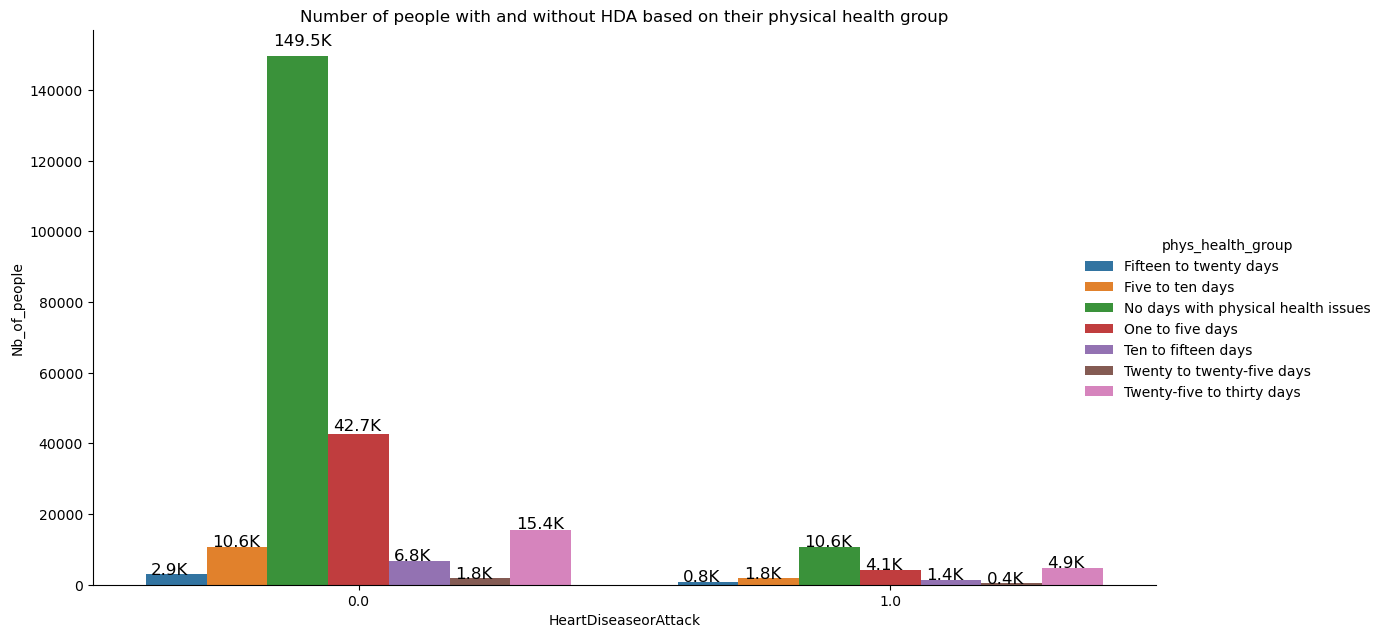

In [68]:
g = sns.catplot(kind='bar', data=nb_of_people_depending_on_phys_health_level, x='HeartDiseaseorAttack', y='Nb_of_people', hue = 'phys_health_group').set(title = "Number of people with and without HDA based on their physical health group")
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [69]:
#Total calculations
no_phys_health_issues_total = all_phys_health[all_phys_health["phys_health_group"] == "No days with physical health issues"]
no_phys_health_issues_total = len(no_phys_health_issues_total)

one_to_five_days_with_phys_issues_total= all_phys_health[all_phys_health["phys_health_group"] == "One to five days"]
one_to_five_days_with_phys_issues_total = len(one_to_five_days_with_phys_issues_total)

five_to_ten_days_with_phys_health_issues_total = all_phys_health[all_phys_health["phys_health_group"] == "Five to ten days"]
five_to_ten_days_with_phys_health_issues_total = len(five_to_ten_days_with_phys_health_issues_total)

ten_to_fifteen_days_with_phys_health_issues_total = all_phys_health[all_phys_health["phys_health_group"] == "Ten to fifteen days"]
ten_to_fifteen_days_with_phys_health_issues_total = len(ten_to_fifteen_days_with_phys_health_issues_total)

fifteen_to_twenty_days_with_phys_health_issues_total = all_phys_health[all_phys_health["phys_health_group"] == "Fifteen to twenty days"]
fifteen_to_twenty_days_with_phys_health_issues_total = len(fifteen_to_twenty_days_with_phys_health_issues_total)

twenty_to_twentyfive_days_with_phys_health_issues_total = all_phys_health[all_phys_health["phys_health_group"] == "Twenty to twenty-five days"]
twenty_to_twentyfive_days_with_phys_health_issues_total = len(twenty_to_twentyfive_days_with_phys_health_issues_total)

twentyfive_to_thirty_days_with_phys_health_issues_total = all_phys_health[all_phys_health["phys_health_group"] == "Twenty-five to thirty days"]
twentyfive_to_thirty_days_with_phys_health_issues_total = len(twentyfive_to_thirty_days_with_phys_health_issues_total)



print(f"{no_phys_health_issues_total} people did not have physical health issues during the past month")
print(f"{one_to_five_days_with_phys_issues_total} people had 1 to 5 days of physical health issues during the past month")
print(f"{five_to_ten_days_with_phys_health_issues_total} people had 5 to 10 days of physical health issues during the past month")
print(f"{ten_to_fifteen_days_with_phys_health_issues_total} people had 10 to 15 days of physical health issues during the past month.")
print(f"{fifteen_to_twenty_days_with_phys_health_issues_total} people had 15 to 20 days of physical health issues during the past month")
print(f"{twenty_to_twentyfive_days_with_phys_health_issues_total} people had 20 to 25 days of physical health issues during the past month.")
print(f"{twentyfive_to_thirty_days_with_phys_health_issues_total} people had 25 to 30 days of physical health issues during the past month.")


print(f"Total number of people : {no_phys_health_issues_total + one_to_five_days_with_phys_issues_total + five_to_ten_days_with_phys_health_issues_total + ten_to_fifteen_days_with_phys_health_issues_total + fifteen_to_twenty_days_with_phys_health_issues_total+twenty_to_twentyfive_days_with_phys_health_issues_total+ twentyfive_to_thirty_days_with_phys_health_issues_total}")


'''Since the PhysHlth column has become, phys_health_group, the df is now sorting by phys_health_group in alphabetical order.
I now need to add the total in this order to add the right values in the output'''

#Adding totals of each category to the table
total = [fifteen_to_twenty_days_with_phys_health_issues_total,fifteen_to_twenty_days_with_phys_health_issues_total,five_to_ten_days_with_phys_health_issues_total,five_to_ten_days_with_phys_health_issues_total,no_phys_health_issues_total,no_phys_health_issues_total,one_to_five_days_with_phys_issues_total,one_to_five_days_with_phys_issues_total,ten_to_fifteen_days_with_phys_health_issues_total,ten_to_fifteen_days_with_phys_health_issues_total,twenty_to_twentyfive_days_with_phys_health_issues_total,twenty_to_twentyfive_days_with_phys_health_issues_total,twentyfive_to_thirty_days_with_phys_health_issues_total,twentyfive_to_thirty_days_with_phys_health_issues_total]
nb_of_people_depending_on_phys_health_level["total"] = total

#Transforming the new column into the right type to calculate the percentage
nb_of_people_depending_on_phys_health_level["total"] = nb_of_people_depending_on_phys_health_level["total"].astype(int)
nb_of_people_depending_on_phys_health_level["percentage_of_total"] = round(nb_of_people_depending_on_phys_health_level["Nb_of_people"] / nb_of_people_depending_on_phys_health_level["total"]*100,2)

#Dropping columns to facilitate graph reading
nb_of_people_depending_on_phys_health_level = nb_of_people_depending_on_phys_health_level[nb_of_people_depending_on_phys_health_level["HeartDiseaseorAttack"] == 1]
nb_of_people_depending_on_phys_health_level

160052 people did not have physical health issues during the past month
46811 people had 1 to 5 days of physical health issues during the past month
12451 people had 5 to 10 days of physical health issues during the past month
8209 people had 10 to 15 days of physical health issues during the past month.
3655 people had 15 to 20 days of physical health issues during the past month
2197 people had 20 to 25 days of physical health issues during the past month.
20305 people had 25 to 30 days of physical health issues during the past month.
Total number of people : 253680


,phys_health_group,HeartDiseaseorAttack,Nb_of_people,total,percentage_of_total
1,Fifteen to twenty days,1.0,750,3655,20.52
3,Five to ten days,1.0,1811,12451,14.55
5,No days with physical health issues,1.0,10550,160052,6.59
7,One to five days,1.0,4068,46811,8.69
9,Ten to fifteen days,1.0,1420,8209,17.30
11,Twenty to twenty-five days,1.0,432,2197,19.66
13,Twenty-five to thirty days,1.0,4862,20305,23.94


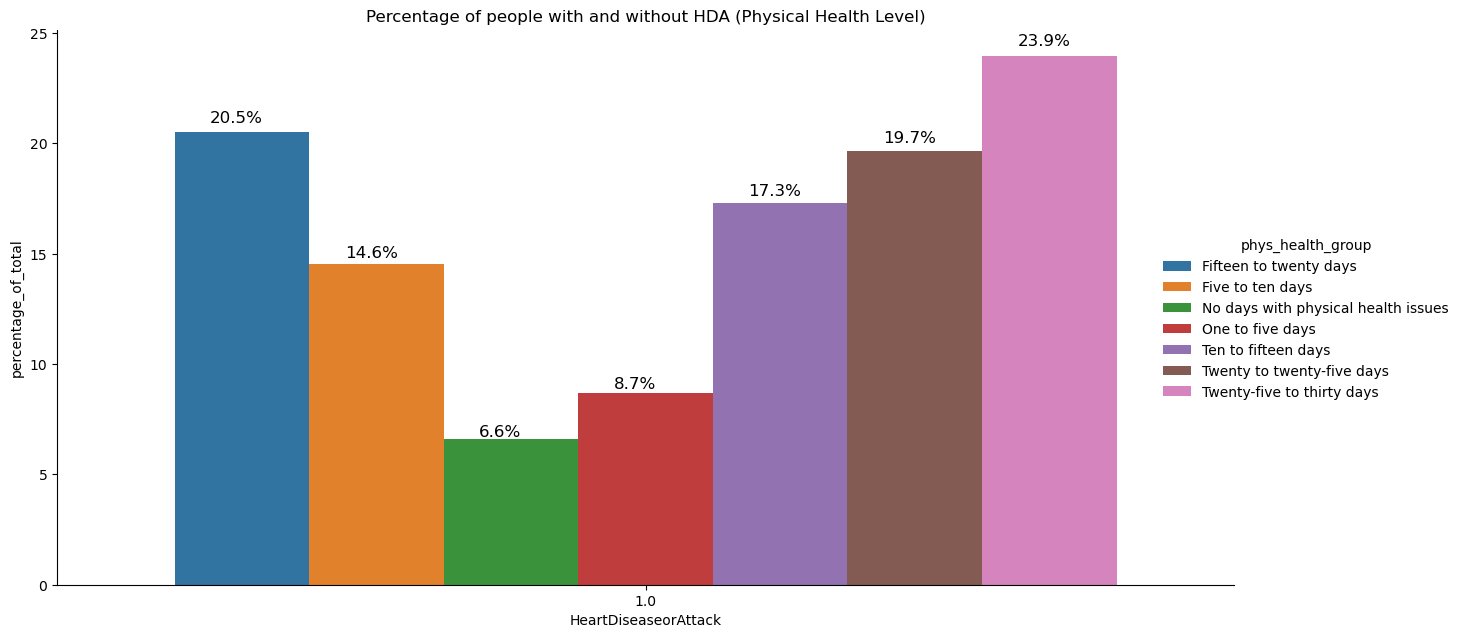

In [70]:
g = sns.catplot(kind = "bar", data = nb_of_people_depending_on_phys_health_level, x = "HeartDiseaseorAttack", y = "percentage_of_total", hue = "phys_health_group").set(title = "Percentage of people with and without HDA (Physical Health Level)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.03, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.17 Difficulty walking

Do you have serious difficulty walking or climbing stairs?

0 = No difficulty

1 = Has difficulty

In [71]:
heart_disease_dataset.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

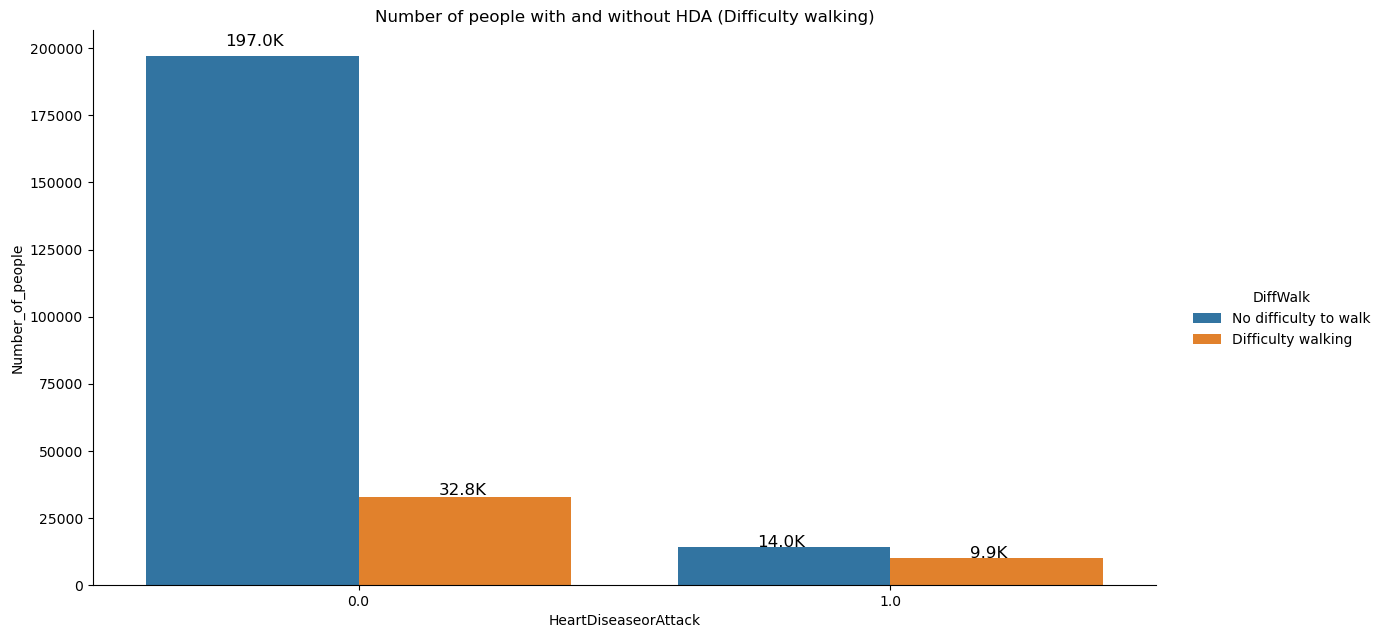

In [72]:
difficulty_walking_check = heart_disease_dataset[["HeartDiseaseorAttack","DiffWalk"]]
difficulty_walking_check = pd.DataFrame(difficulty_walking_check.value_counts())
difficulty_walking_check.reset_index(inplace = True)
difficulty_walking_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)

#Sorting
difficulty_walking_check.sort_values(by = "DiffWalk", inplace = True)

#Transforming value into string to improve graph reading
difficulty_walking_check["DiffWalk"] = difficulty_walking_check["DiffWalk"].astype(str)
difficulty_walking_check["DiffWalk"] = difficulty_walking_check["DiffWalk"].replace("0.0", "No difficulty to walk").replace("1.0","Difficulty walking")


g = sns.catplot(kind = "bar",data = difficulty_walking_check , x = "HeartDiseaseorAttack", y = "Number_of_people", hue = "DiffWalk").set(title = "Number of people with and without HDA (Difficulty walking)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [73]:
#Total calculations

#Finding how many people reported having difficulty to walk
Reported_difficulty_to_walk_count = pd.DataFrame(heart_disease_dataset["DiffWalk"])
Reported_difficulty_to_walk_count = Reported_difficulty_to_walk_count[Reported_difficulty_to_walk_count["DiffWalk"] == 1]
Reported_difficulty_to_walk_count = len(Reported_difficulty_to_walk_count)

#Finding how many people reported having no difficulty to walk
Reported_no__difficulty_to_walk_count = pd.DataFrame(heart_disease_dataset["DiffWalk"])
Reported_no__difficulty_to_walk_count = Reported_no__difficulty_to_walk_count[Reported_no__difficulty_to_walk_count["DiffWalk"] == 0]
Reported_no__difficulty_to_walk_count = len(Reported_no__difficulty_to_walk_count)

print(f"{Reported_no__difficulty_to_walk_count} people have not reported difficulty to walk.")
print(f"{Reported_difficulty_to_walk_count} people have reported difficulty to walk.")
print(f"Total number of people : {Reported_difficulty_to_walk_count + Reported_no__difficulty_to_walk_count }")

#Percentages
total = [Reported_no__difficulty_to_walk_count,Reported_no__difficulty_to_walk_count,Reported_difficulty_to_walk_count, Reported_difficulty_to_walk_count]
difficulty_walking_check["Total_number_of_people_in_each_diff_walk_category"] = total
difficulty_walking_check["Percentages"] = round(difficulty_walking_check["Number_of_people"] / difficulty_walking_check["Total_number_of_people_in_each_diff_walk_category"] *100,2)
difficulty_walking_check

211005 people have not reported difficulty to walk.
42675 people have reported difficulty to walk.
Total number of people : 253680


,HeartDiseaseorAttack,DiffWalk,Number_of_people,Total_number_of_people_in_each_diff_walk_category,Percentages
0,0.0,No difficulty to walk,197027,211005,93.38
2,1.0,No difficulty to walk,13978,211005,6.62
1,0.0,Difficulty walking,32760,42675,76.77
3,1.0,Difficulty walking,9915,42675,23.23


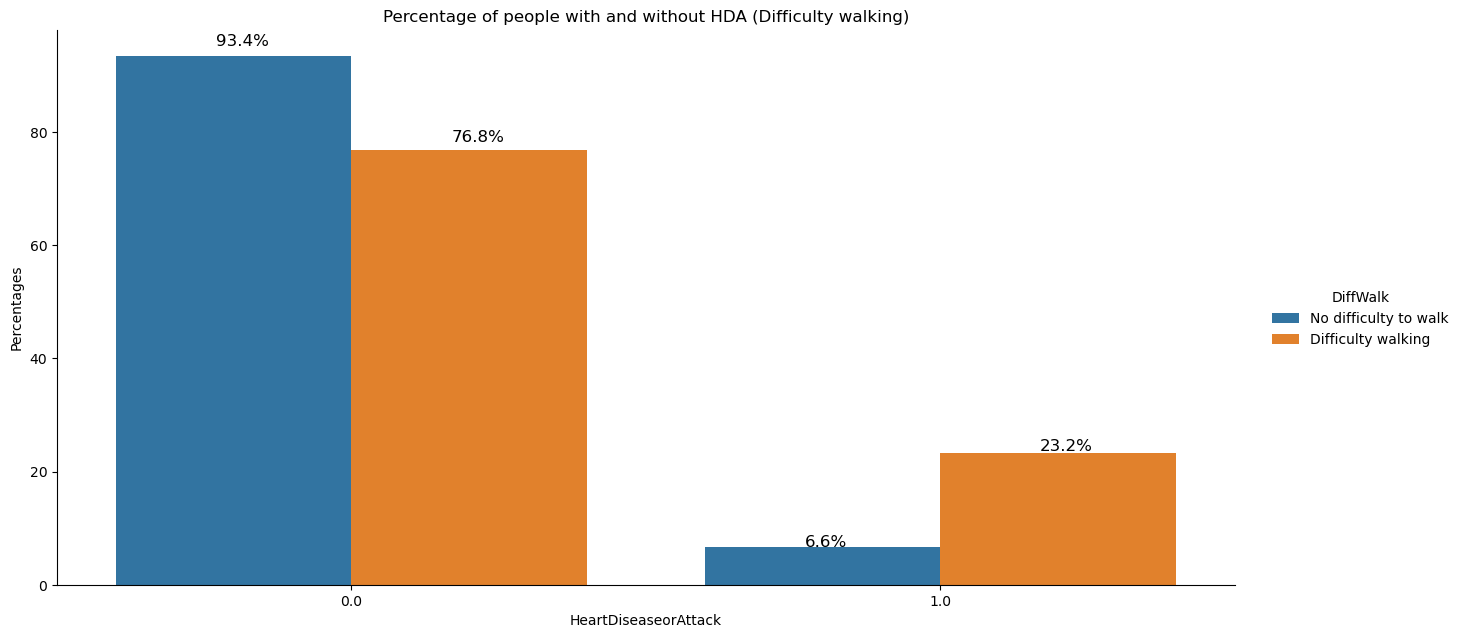

In [74]:
g = sns.catplot(kind = "bar", data = difficulty_walking_check, x = "HeartDiseaseorAttack", y = "Percentages", hue = "DiffWalk").set(title = "Percentage of people with and without HDA (Difficulty walking)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.17, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

# 3.18 Gender

### 3.18.1 Looking at the number of people for men and women

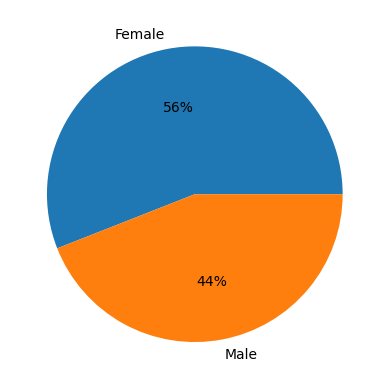

In [75]:
#Finding out the proportion of male and female
#Female = 0, Male = 1

sex_count = heart_disease_dataset["Sex"].value_counts()
labels = ["Female","Male"]
plt.pie(sex_count, labels = labels, autopct = '%0.0f%%')
plt.show()

Female are more represented in the dataset, but male are represented enough to avoid having a "female biais" on the conclusions

### 3.18.2 Gender influence on having a heart disease

In [76]:
gender_check = heart_disease_dataset[["HeartDiseaseorAttack","Sex"]]
gender_check = pd.DataFrame(gender_check.value_counts())
gender_check.reset_index(inplace = True)
gender_check.rename(columns = { 0 : "Number_of_people"}, inplace = True)
gender_check

#Sorting
gender_check.sort_values(by = "Sex", inplace = True)

#Transforming value into string to improve graph reading
gender_check["Sex"] = gender_check["Sex"].astype(str)
gender_check["Sex"] = gender_check["Sex"].replace("0.0", "Women").replace("1.0","Men")
gender_check

,HeartDiseaseorAttack,Sex,Number_of_people
0,0.0,Women,131769
3,1.0,Women,10205
1,0.0,Men,98018
2,1.0,Men,13688


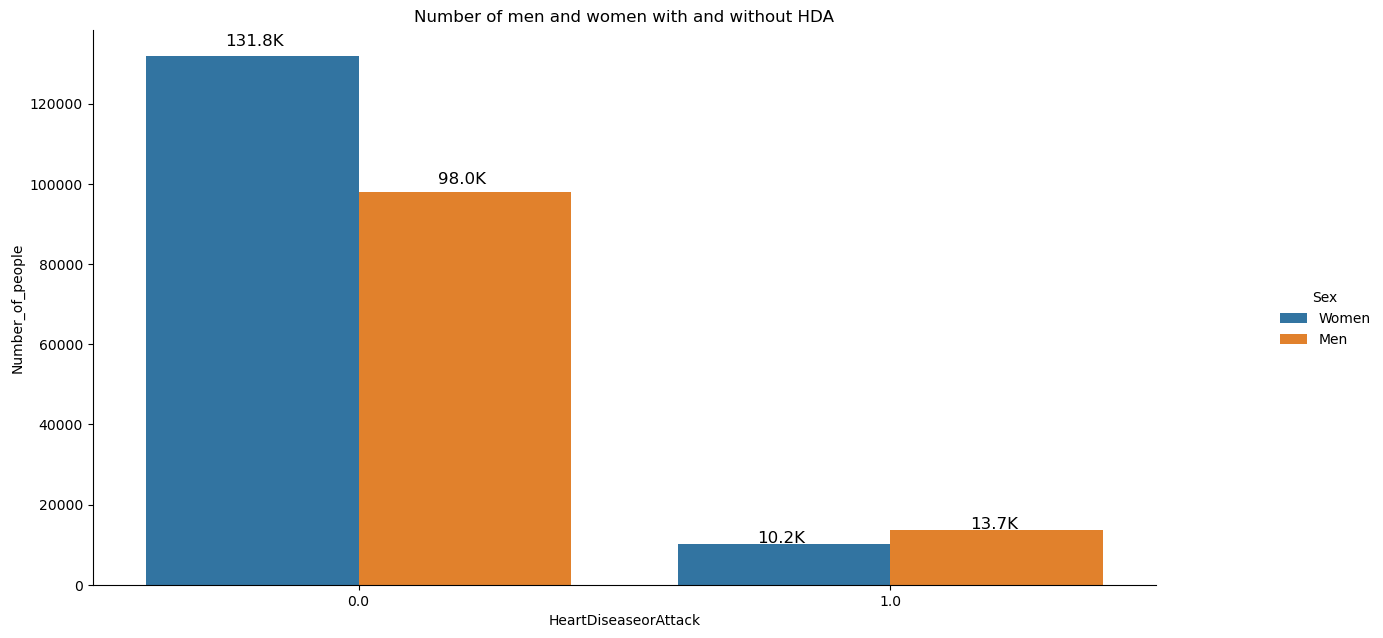

In [77]:
g = sns.catplot(kind = "bar",data = gender_check, y = "Number_of_people", x = "HeartDiseaseorAttack", hue = "Sex").set(title = "Number of men and women with and without HDA")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

Although there are less men in the dataset, the number of men with an HDA is higher than the number of women, this would tend to indicate that sex plays an important role in developping an HDA or not.
To make a good comparison, I will see the percentage of people developping a HDA in each category;

We must also keep in mind that when I say "sex plays an important role" I am overlooking other characteristics that are influenced by the gender, for example, men tend to be heavier smoker than women etc... Which will obviously influence the result.
The goal of this preliminary EDA is to identify which characteristics I am going to keep for my final model.

In [78]:
#Total calculations

Reported_less_than_1_count = pd.DataFrame(heart_disease_dataset["Fruits"])
Reported_less_than_1_count = Reported_less_than_1_count[Reported_less_than_1_count["Fruits"] == 0]
Reported_less_than_1_count = len(Reported_less_than_1_count)

#Finding how many women there is
nb_women = pd.DataFrame(heart_disease_dataset["Sex"])
nb_women = nb_women[nb_women["Sex"] == 0]
nb_women = len(nb_women)

#Finding how many men there is
nb_men = pd.DataFrame(heart_disease_dataset["Sex"])
nb_men = nb_men[nb_men["Sex"] == 1 ]
nb_men = len(nb_men)


print(f"{nb_women} Women, and {nb_men} men")
print(f"Total number of people : {nb_women + nb_men }")

#Adding total for each category (men and women), and calculating the percentages
gender_check["Total"] = [nb_women,nb_women,nb_men,nb_men]
gender_check["Percentage_of_total"] = round(gender_check["Number_of_people"] / gender_check["Total"] *100,)
gender_check

141974 Women, and 111706 men
Total number of people : 253680


,HeartDiseaseorAttack,Sex,Number_of_people,Total,Percentage_of_total
0,0.0,Women,131769,141974,93.0
3,1.0,Women,10205,141974,7.0
1,0.0,Men,98018,111706,88.0
2,1.0,Men,13688,111706,12.0


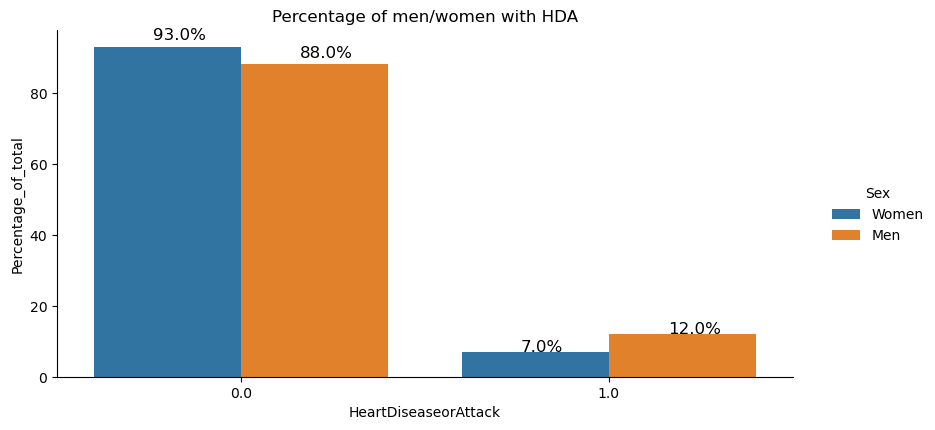

In [79]:
g = sns.catplot(kind = "bar", data = gender_check, x = "HeartDiseaseorAttack", y = "Percentage_of_total", hue = "Sex").set(title = "Percentage of men/women with HDA")

g.fig.set_size_inches(10,5)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.16, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.19 Age 

In [80]:
#Looking at the heart disorders age repartiton

In [81]:
# Counting the number of values by age
Has_a_disorder = heart_disease_dataset[heart_disease_dataset["HeartDiseaseorAttack"] == 1]
nb_heartdisorder_by_age = Has_a_disorder["HeartDiseaseorAttack"].groupby(Has_a_disorder["Age"]).value_counts()
nb_heartdisorder_by_age = pd.DataFrame(nb_heartdisorder_by_age)
nb_heartdisorder_by_age.rename(columns = {"HeartDiseaseorAttack": "nb_of_people_with_disorder"}, inplace = True)
nb_heartdisorder_by_age.reset_index()

,Age,HeartDiseaseorAttack,nb_of_people_with_disorder
0,1.0,1.0,29
1,2.0,1.0,54
2,3.0,1.0,126
3,4.0,1.0,193
4,5.0,1.0,351
5,6.0,1.0,712
6,7.0,1.0,1425
7,8.0,1.0,2253
8,9.0,1.0,3358
9,10.0,1.0,4193


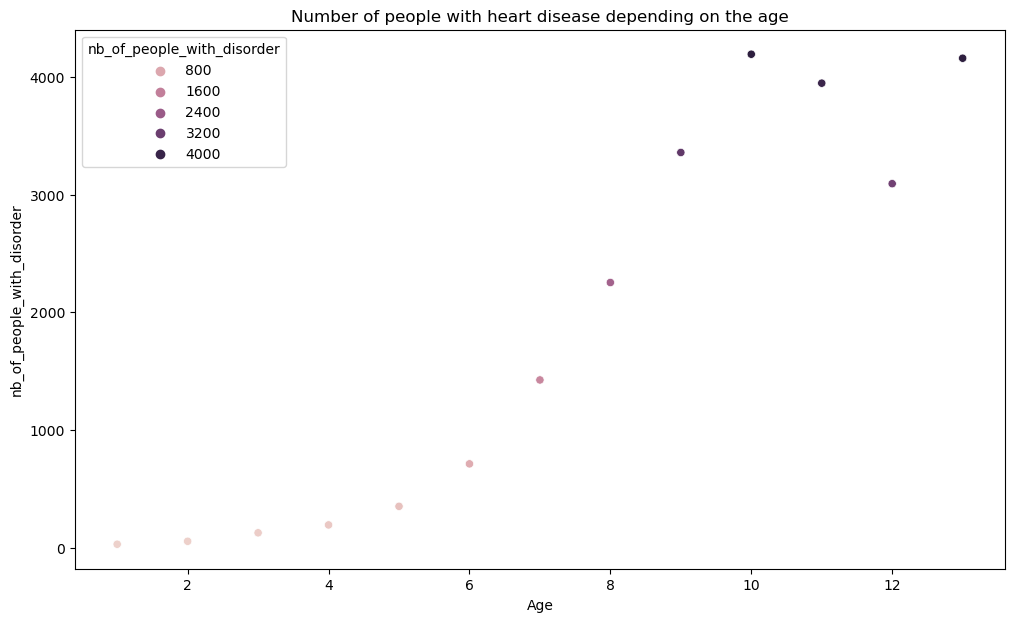

In [82]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = nb_heartdisorder_by_age, x = "Age", y = "nb_of_people_with_disorder", hue = "nb_of_people_with_disorder").set(title = "Number of people with heart disease depending on the age")
plt.show()

Age is classified as follows : 

1 Age 18 to 24

2 Age 25 to 29

3 Age 30 to 34

4 Age 35 to 39

5 Age 40 to 44

6 Age 45 to 49

7 Age 50 to 54

8 Age 55 to 59

9 Age 60 to 64

10 Age 65 to 69

11 Age 70 to 74

12 Age 75 to 79

13 Age 80 or older

From the graph, it is very clear that the number of heart disorders reported increase with age.

## 3.20 Education 

What is the highest grade or year of school you completed?

1: Never attended school or only kindergarten

2: Grades 1 through 8 (Elementary)

3: Grades 9 through 11 (Some high school)

4: Grade 12 or GED (High school graduate)

5: College 1 year to 3 years (Some college or technical school)

6: College 4 years or more (College graduate)

In [83]:
#Isolationg the needed columns and sorting the values
education_check = heart_disease_dataset[["HeartDiseaseorAttack","Education"]]
education_check.sort_values(by = "Education", inplace = True)
education_check

,HeartDiseaseorAttack,Education
210905,0.0,1.0
233922,1.0,1.0
8586,1.0,1.0
213127,0.0,1.0
135105,0.0,1.0
...,...,...
144933,0.0,6.0
144930,0.0,6.0
144926,0.0,6.0
36251,0.0,6.0


In [84]:
#Creating Education groups and adding a column with the group description

no_education_or_kindergarten = education_check[education_check["Education"] == 1]
no_education_or_kindergarten["education_group"] = "Never attended school/only kindergarten"

elementary = education_check[education_check["Education"] == 2]
elementary["education_group"] = "Elementary"

some_high_school = education_check[education_check["Education"] == 3]
some_high_school["education_group"] = "Some high School"

high_school_graduate = education_check[education_check["Education"] == 4]
high_school_graduate["education_group"] = "High school graduate"

some_college_or_technical_school = education_check[education_check["Education"] == 5]
some_college_or_technical_school["education_group"] = "Some college or technical school"

college_graduate = education_check[education_check["Education"] == 6]
college_graduate["education_group"] = "College graduate"


#Appending the dataframes together for visualisation
all_educations = no_education_or_kindergarten.append(elementary).append(some_high_school).append(high_school_graduate).append(some_college_or_technical_school).append(college_graduate)
all_educations.sample(25)

,HeartDiseaseorAttack,Education,education_group
111765,0.0,6.0,College graduate
99436,0.0,6.0,College graduate
126763,0.0,4.0,High school graduate
107130,0.0,6.0,College graduate
106193,0.0,6.0,College graduate
4616,0.0,4.0,High school graduate
154498,0.0,6.0,College graduate
195293,0.0,5.0,Some college or technical school
188710,0.0,5.0,Some college or technical school
171481,0.0,6.0,College graduate


In [85]:
#Creating the needed dataframe to plot
nb_of_people_depending_on_education_level = all_educations.groupby("Education").value_counts().to_frame()
nb_of_people_depending_on_education_level = pd.DataFrame(nb_of_people_depending_on_education_level)
nb_of_people_depending_on_education_level.reset_index(inplace = True)
nb_of_people_depending_on_education_level.drop(columns = ["Education"], inplace = True)
nb_of_people_depending_on_education_level.columns = ["HeartDiseaseorAttack","education_group","Nb_of_people"]

nb_of_people_depending_on_education_level = nb_of_people_depending_on_education_level.groupby(["education_group","HeartDiseaseorAttack"]).sum()
nb_of_people_depending_on_education_level.reset_index(inplace = True)
nb_of_people_depending_on_education_level
#The total number of people is 253 680, as expected

,education_group,HeartDiseaseorAttack,Nb_of_people
0,College graduate,0.0,100242
1,College graduate,1.0,7083
2,Elementary,0.0,3265
3,Elementary,1.0,778
4,High school graduate,0.0,55283
5,High school graduate,1.0,7467
6,Never attended school/only kindergarten,0.0,145
7,Never attended school/only kindergarten,1.0,29
8,Some college or technical school,0.0,62992
9,Some college or technical school,1.0,6918


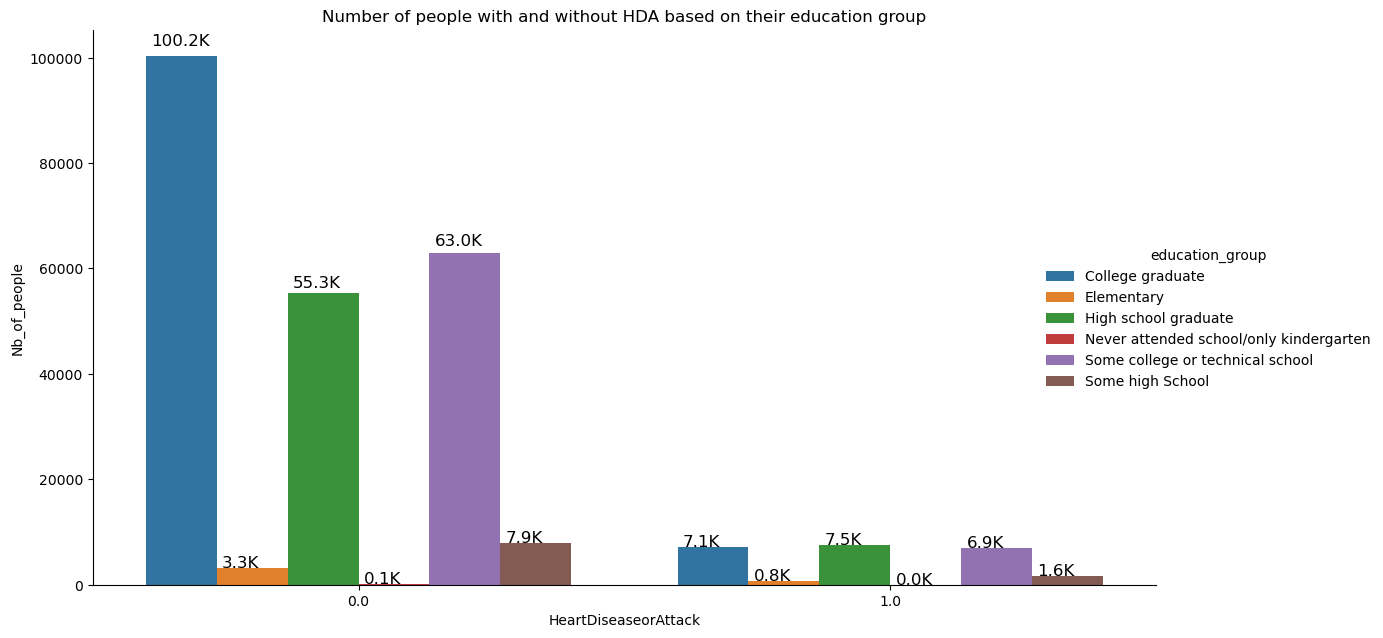

In [86]:
g = sns.catplot(kind='bar', data=nb_of_people_depending_on_education_level, x='HeartDiseaseorAttack', y='Nb_of_people', hue = 'education_group').set(title = "Number of people with and without HDA based on their education group")
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [87]:
#Total calculations
college_graduate_total = all_educations[all_educations["education_group"] == "College graduate"]
college_graduate_total = len(college_graduate_total)

elementary_total = all_educations[all_educations["education_group"] == "Elementary"]
elementary_total = len(elementary_total)

high_school_graduate_total = all_educations[all_educations["education_group"] == "High school graduate"]
high_school_graduate_total = len(high_school_graduate_total)

never_attended_or_only_kindergarten_total = all_educations[all_educations["education_group"] == "Never attended school/only kindergarten"]
never_attended_or_only_kindergarten_total = len(never_attended_or_only_kindergarten_total)

some_college_or_technical_school = all_educations[all_educations["education_group"] == "Some college or technical school"]
some_college_or_technical_school = len(some_college_or_technical_school)

some_high_school_total = all_educations[all_educations["education_group"] == "Some high School"]
some_high_school_total = len(some_high_school_total)



print(f"{college_graduate_total} people have graduated college.")
print(f"{elementary_total} people went to elementary school.")
print(f"{high_school_graduate_total} people have graduated high school.")
print(f"{never_attended_or_only_kindergarten_total} people never attended school, or only attended kindergarten.")
print(f"{some_college_or_technical_school} people spent a few years in college or went to a technical school")
print(f"{some_high_school_total} people spent a few years in high school but didn't graduate.")


print(f"Total number of people : {college_graduate_total + elementary_total + high_school_graduate_total + never_attended_or_only_kindergarten_total + some_college_or_technical_school+some_high_school_total}")


#Adding totals of each category to the table
total = [college_graduate_total,college_graduate_total,elementary_total,elementary_total,high_school_graduate_total,high_school_graduate_total,never_attended_or_only_kindergarten_total,never_attended_or_only_kindergarten_total,some_college_or_technical_school,some_college_or_technical_school,some_high_school_total,some_high_school_total]
nb_of_people_depending_on_education_level["total"] = total

#Transforming the new column into the right type to calculate the percentage
nb_of_people_depending_on_education_level["total"] = nb_of_people_depending_on_education_level["total"].astype(int)
nb_of_people_depending_on_education_level["percentage_of_total"] = round(nb_of_people_depending_on_education_level["Nb_of_people"] / nb_of_people_depending_on_education_level["total"]*100,2)

#Dropping columns to facilitate graph reading
nb_of_people_depending_on_education_level = nb_of_people_depending_on_education_level[nb_of_people_depending_on_education_level["HeartDiseaseorAttack"] == 1]
nb_of_people_depending_on_education_level

107325 people have graduated college.
4043 people went to elementary school.
62750 people have graduated high school.
174 people never attended school, or only attended kindergarten.
69910 people spent a few years in college or went to a technical school
9478 people spent a few years in high school but didn't graduate.
Total number of people : 253680


,education_group,HeartDiseaseorAttack,Nb_of_people,total,percentage_of_total
1,College graduate,1.0,7083,107325,6.60
3,Elementary,1.0,778,4043,19.24
5,High school graduate,1.0,7467,62750,11.90
7,Never attended school/only kindergarten,1.0,29,174,16.67
9,Some college or technical school,1.0,6918,69910,9.90
11,Some high School,1.0,1618,9478,17.07


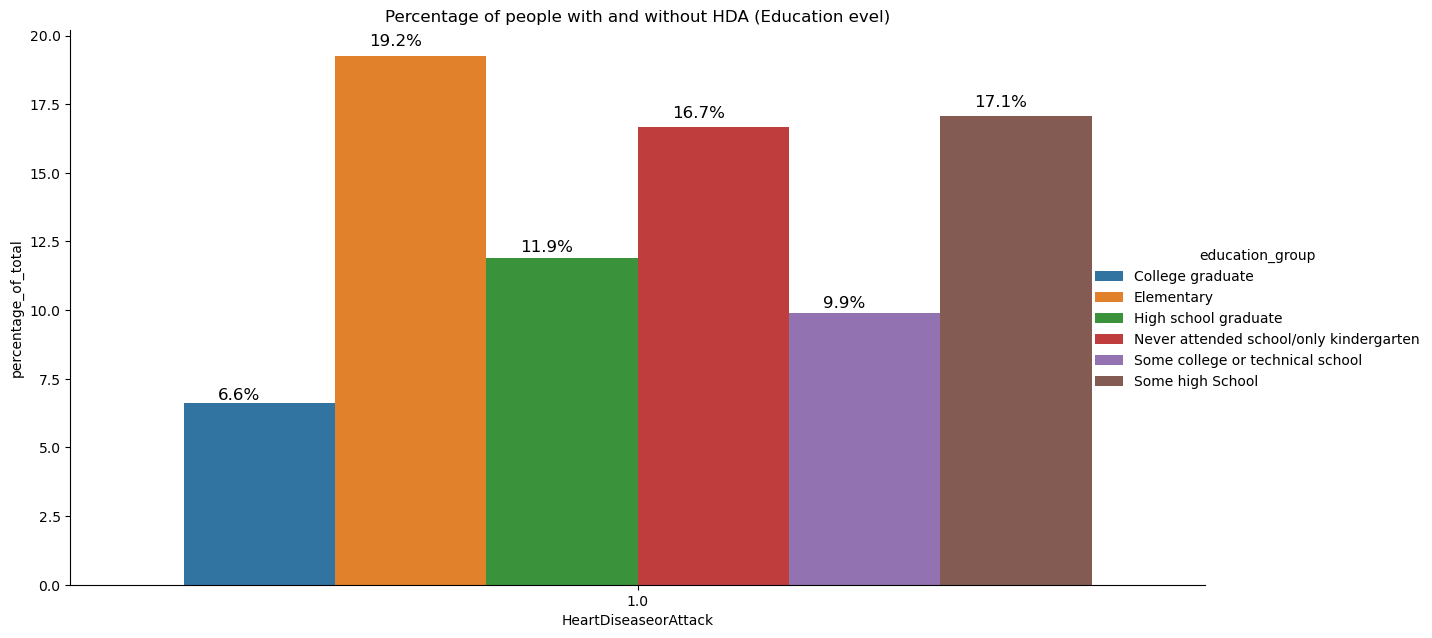

In [88]:
g = sns.catplot(kind = "bar", data = nb_of_people_depending_on_education_level, x = "HeartDiseaseorAttack", y = "percentage_of_total", hue = "education_group").set(title = "Percentage of people with and without HDA (Education evel)")

g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.03, 
            p.get_height() * 1.02, 
           '{0:.1%}'.format(p.get_height()/100),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

## 3.21 Income

Income of the respondent 

1: Less than $10,000

2: Less than $15,000

3: Less than $20,000 

4: Less than $25,000 

5: Less than $35,000

6: Less than $50,000

7: Less than $75,000

8: Less than $100,000

9: Less than $150,000

10: Less than $200,000

11: $200,000 or more


In [89]:
#Isolationg the needed columns and sorting the values
income_check = heart_disease_dataset[["HeartDiseaseorAttack","Income"]]
income_check.sort_values(by = "Income", inplace = True)
income_check

,HeartDiseaseorAttack,Income
175143,0.0,1.0
88582,1.0,1.0
212793,0.0,1.0
88583,0.0,1.0
212785,1.0,1.0
...,...,...
192859,0.0,8.0
158156,0.0,8.0
192857,0.0,8.0
192833,0.0,8.0


In [90]:
#Creating the needed dataframe to plot
nb_of_people_depending_income_level = income_check.groupby("Income").value_counts().to_frame()
nb_of_people_depending_income_level = pd.DataFrame(nb_of_people_depending_income_level)
nb_of_people_depending_income_level.reset_index(inplace = True)
nb_of_people_depending_income_level.columns = ["Income", "HeartDiseaseorAttack","Nb_of_people"]

nb_of_people_depending_income_level = nb_of_people_depending_income_level.groupby(["Income","HeartDiseaseorAttack"]).sum()
nb_of_people_depending_income_level.reset_index(inplace = True)
nb_of_people_depending_income_level
#The total number of people is 253 680, as expected

#Sorting using natsort to be able to sort strings with numbers
nb_of_people_depending_income_level.sort_values(by = "Income")
nb_of_people_depending_income_level

,Income,HeartDiseaseorAttack,Nb_of_people
0,1.0,0.0,8258
1,1.0,1.0,1553
2,2.0,0.0,9586
3,2.0,1.0,2197
4,3.0,0.0,13475
5,3.0,1.0,2519
6,4.0,0.0,17307
7,4.0,1.0,2828
8,5.0,0.0,22722
9,5.0,1.0,3161


While looking at the data, we can see that there are no repondents earning more than $100,000.
In case other datasets have groups earning more than that, we need to find a possibility to add them in the analysis.

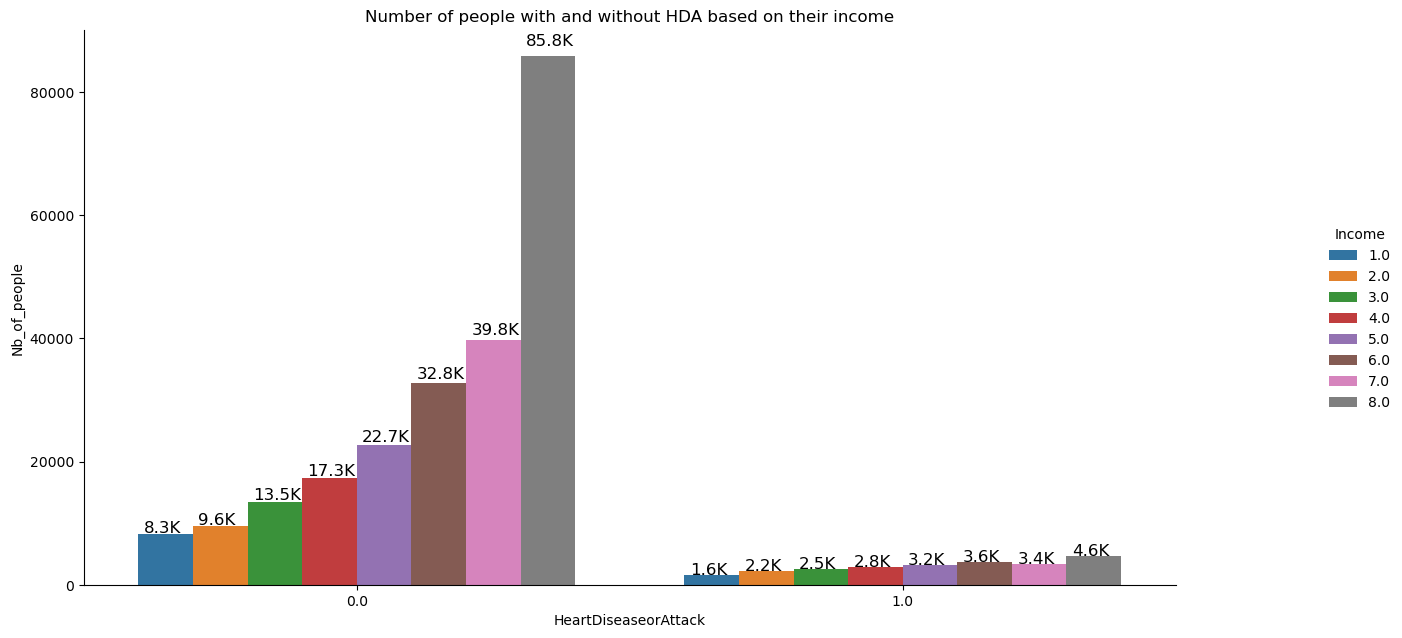

In [91]:
g = sns.catplot(kind='bar', data=nb_of_people_depending_income_level, x='HeartDiseaseorAttack', y='Nb_of_people', hue = 'Income').set(title = "Number of people with and without HDA based on their income")
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

In [92]:
#Finding out which income categories are in the table

is_there_200_or_more = 11 in nb_of_people_depending_income_level["Income"].values

is_there_200_or_less = 10 in nb_of_people_depending_income_level["Income"].values

is_there_150_or_less = 9 in nb_of_people_depending_income_level["Income"].values

is_there_100_or_less = 8 in nb_of_people_depending_income_level["Income"].values

is_there_75_or_less = 7 in nb_of_people_depending_income_level["Income"].values

is_there_50_or_less = 6 in nb_of_people_depending_income_level["Income"].values

is_there_35_or_less = 5 in nb_of_people_depending_income_level["Income"].values

is_there_25_or_less = 4 in nb_of_people_depending_income_level["Income"].values

is_there_20_or_less = 3 in nb_of_people_depending_income_level["Income"].values

is_there_15_or_less = 2 in nb_of_people_depending_income_level["Income"].values

is_there_10_or_less = 1 in nb_of_people_depending_income_level["Income"].values


In [93]:
#Total calculations
less_than_10 = income_check[income_check["Income"] == 1]
less_than_10 = len(less_than_10)

less_than_15 = income_check[income_check["Income"] == 2]
less_than_15 = len(less_than_15)

less_than_20 = income_check[income_check["Income"] == 3]
less_than_20 = len(less_than_20)

less_than_25 = income_check[income_check["Income"] == 4]
less_than_25 = len(less_than_25)

less_than_35 = income_check[income_check["Income"] == 5]
less_than_35 = len(less_than_35)

less_than_50 = income_check[income_check["Income"] == 6]
less_than_50 = len(less_than_50)

less_than_75 = income_check[income_check["Income"] == 7]
less_than_75 = len(less_than_75)

less_than_100 = income_check[income_check["Income"] == 8]
less_than_100 = len(less_than_100)

less_than_150 = income_check[income_check["Income"] == 9]
less_than_150 = len(less_than_150)

less_than_200 = income_check[income_check["Income"] == 10]
less_than_200 = len(less_than_200)

two_hundred_or_more = income_check[income_check["Income"] == 11]
two_hundred_or_more = len(two_hundred_or_more)

print(f"Total number of people : {less_than_10 + less_than_15 + less_than_20 + less_than_25 + less_than_35 + less_than_50 + less_than_75 + less_than_100 + less_than_150 + less_than_200 + two_hundred_or_more}")

print(f"{less_than_10} people earn less than $10,000.")
print(f"{less_than_15} people earn less than $15,000.")
print(f"{less_than_20} people earn less than $20,000.")
print(f"{less_than_25} people earn less than $25,000.")
print(f"{less_than_35} people earn less than $35,000.")
print(f"{less_than_50} people earn less than $50,000.")
print(f"{less_than_75} people earn less than $75,000.")
print(f"{less_than_100} people earn less than $100,000.")
print(f"{less_than_150} people earn less than $150,000.")
print(f"{less_than_200} people earn less than $200,000.")
print(f"{two_hundred_or_more} people earn more than $200,000.")

#Adding totals of each category to the table by checking which income categories are represented

total = []

if is_there_10_or_less == True:
    total.append(less_than_10)
    total.append(less_than_10)
    
if is_there_15_or_less == True:
    total.append(less_than_15)
    total.append(less_than_15)
    
if is_there_20_or_less == True:
    total.append(less_than_20)
    total.append(less_than_20)
    
if is_there_25_or_less == True:
    total.append(less_than_25)
    total.append(less_than_25)
    
if is_there_35_or_less == True:
    total.append(less_than_35)
    total.append(less_than_35)

if is_there_50_or_less == True:
    total.append(less_than_50)
    total.append(less_than_50)
    
if is_there_75_or_less == True:
    total.append(less_than_75)
    total.append(less_than_75)
    
if is_there_100_or_less == True:
    total.append(less_than_100)
    total.append(less_than_100)
    
if is_there_150_or_less == True:
    total.append(less_than_150)
    total.append(less_than_150)
    
if is_there_200_or_less == True:
    total.append(less_than_200)
    total.append(less_than_200)
    
if is_there_200_or_more == True:
    total.append(two_hundred_or_more)
    total.append(two_hundred_or_more)

nb_of_people_depending_income_level["total"] = total

#Transforming the new column into the right type to calculate the percentage
nb_of_people_depending_income_level["percentage_of_total"] = round(nb_of_people_depending_income_level["Nb_of_people"] / nb_of_people_depending_income_level["total"]*100,2)
nb_of_people_depending_income_level

Total number of people : 253680
9811 people earn less than $10,000.
11783 people earn less than $15,000.
15994 people earn less than $20,000.
20135 people earn less than $25,000.
25883 people earn less than $35,000.
36470 people earn less than $50,000.
43219 people earn less than $75,000.
90385 people earn less than $100,000.
0 people earn less than $150,000.
0 people earn less than $200,000.
0 people earn more than $200,000.


,Income,HeartDiseaseorAttack,Nb_of_people,total,percentage_of_total
0,1.0,0.0,8258,9811,84.17
1,1.0,1.0,1553,9811,15.83
2,2.0,0.0,9586,11783,81.35
3,2.0,1.0,2197,11783,18.65
4,3.0,0.0,13475,15994,84.25
5,3.0,1.0,2519,15994,15.75
6,4.0,0.0,17307,20135,85.95
7,4.0,1.0,2828,20135,14.05
8,5.0,0.0,22722,25883,87.79
9,5.0,1.0,3161,25883,12.21


In [94]:
#Only keeping people with heart disease to simplify graph reading
nb_of_people_depending_income_level = nb_of_people_depending_income_level[nb_of_people_depending_income_level["HeartDiseaseorAttack"] == 1 ]
nb_of_people_depending_income_level.sort_values(by = "percentage_of_total", inplace = True)
nb_of_people_depending_income_level

,Income,HeartDiseaseorAttack,Nb_of_people,total,percentage_of_total
15,8.0,1.0,4585,90385,5.07
13,7.0,1.0,3404,43219,7.88
11,6.0,1.0,3646,36470,10.00
9,5.0,1.0,3161,25883,12.21
7,4.0,1.0,2828,20135,14.05
5,3.0,1.0,2519,15994,15.75
1,1.0,1.0,1553,9811,15.83
3,2.0,1.0,2197,11783,18.65


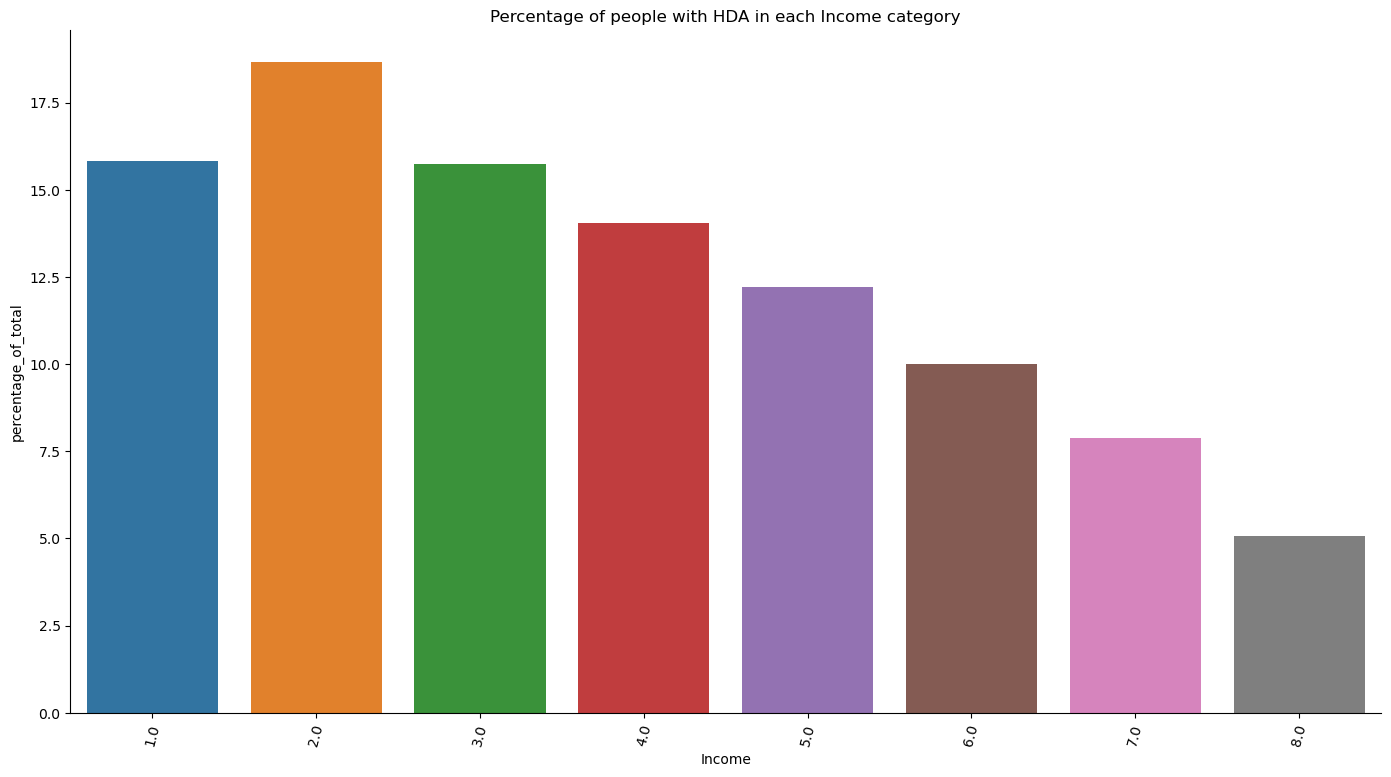

In [96]:
g = sns.catplot(kind = "bar", data = nb_of_people_depending_income_level, x = "Income", y = "percentage_of_total").set(title = "Percentage of people with HDA in each Income category")
g.fig.set_size_inches(16,8)
plt.xticks(rotation = 75)
plt.show()